# data

In [3]:
# pip install scikit-learn-extra

In [1]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
import scipy.cluster.hierarchy as sch 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import seaborn as sns

In [36]:
metadata=pd.read_csv("covid.csv")
metadata.head(10)

test_date cough fever  sore_throat  shortness_of_breath  head_ache  \
0  3/31/2020    0     0             0                    0          0   
1  3/31/2020    0     0             0                    0          0   
2  3/31/2020    0     0             0                    0          0   
3  3/31/2020    0     0             0                    0          0   
4  3/31/2020    1     0             0                    0          0   
5  3/31/2020    1     1             0                    1          0   
6  3/31/2020    0     0             0                    0          0   
7  3/31/2020    0     0             0                    0          0   
8  3/31/2020    0     0             0                    0          0   
9  3/31/2020    0     0             0                    0          0   

  corona_result age_60_and_above  gender test_indication  
0      negative               No    male           Other  
1      negative               No  female           Other  
2      negative               No    male           Other  
3      positive               No  female           Other  
4      negative               No    male          Abroad  
5      positive               No    male           Other  
6      negative               No    male           Other  
7      negative               No    male           Other  
8      negative               No    male           Other  
9      negative               No    male           Other

In [37]:
metadata.shape

(53843, 10)

In [38]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53843 entries, 0 to 53842
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   test_date            53843 non-null  object
 1   cough                53843 non-null  object
 2   fever                53843 non-null  object
 3   sore_throat          53843 non-null  int64 
 4   shortness_of_breath  53843 non-null  int64 
 5   head_ache            53843 non-null  int64 
 6   corona_result        53843 non-null  object
 7   age_60_and_above     53843 non-null  object
 8   gender               53843 non-null  object
 9   test_indication      53843 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.1+ MB


In [39]:
metadata.drop('test_date', axis=1, inplace=True)

In [40]:
metadata.apply(pd.Series.value_counts)

cough    fever  sore_throat  shortness_of_breath  \
0                           NaN      NaN      53021.0              53189.0   
1                           NaN      NaN        822.0                654.0   
0                       45773.0  49032.0          NaN                  NaN   
1                        8054.0   4794.0          NaN                  NaN   
Abroad                      NaN      NaN          NaN                  NaN   
Contact with confirmed      NaN      NaN          NaN                  NaN   
No                          NaN      NaN          NaN                  NaN   
None                       16.0     17.0          NaN                  NaN   
Other                       NaN      NaN          NaN                  NaN   
Yes                         NaN      NaN          NaN                  NaN   
female                      NaN      NaN          NaN                  NaN   
male                        NaN      NaN          NaN                  NaN   
negative                    NaN      NaN          NaN                  NaN   
other                       NaN      NaN          NaN                  NaN   
positive                    NaN      NaN          NaN                  NaN   

                        head_ache  corona_result  age_60_and_above   gender  \
0                         52648.0            NaN               NaN      NaN   
1                          1195.0            NaN               NaN      NaN   
0                             NaN            NaN               NaN      NaN   
1                             NaN            NaN               NaN      NaN   
Abroad                        NaN            NaN               NaN      NaN   
Contact with confirmed        NaN            NaN               NaN      NaN   
No                            NaN            NaN           45994.0      NaN   
None                          NaN            NaN               NaN   1194.0   
Other                         NaN            NaN               NaN      NaN   
Yes                           NaN            NaN            7849.0      NaN   
female                        NaN            NaN               NaN  26436.0   
male                          NaN            NaN               NaN  26213.0   
negative                      NaN        48225.0               NaN      NaN   
other                         NaN          823.0               NaN      NaN   
positive                      NaN         4795.0               NaN      NaN   

                        test_indication  
0                                   NaN  
1                                   NaN  
0                                   NaN  
1                                   NaN  
Abroad                           5041.0  
Contact with confirmed           3100.0  
No                                  NaN  
None                                NaN  
Other                           45702.0  
Yes                                 NaN  
female                              NaN  
male                                NaN  
negative                            NaN  
other                               NaN  
positive                            NaN

In [117]:
test=metadata.copy()
test['cough']=test['cough'].replace(['1','0','None'],[1, 0, 2])
test['fever']=test['fever'].replace(['1', '0','None'],[1, 0, 2])
test['sore_throat']=test['sore_throat'].replace(['1','0','None'],[1,0,2])
test['shortness_of_breath']=test['shortness_of_breath'].replace(['1','0','None'],[1,0,2])
test['head_ache']=test['head_ache'].replace(['1','0','None'],[1,0,2])
test['gender']=test['gender'].replace(['female', 'male', 'None'], [0, 1, 2])
test['age_60_and_above']=test['age_60_and_above'].replace(['None', 'No', 'Yes'], [2, 0 ,1])
test['test_indication']=test['test_indication'].replace(['Contact with confirmed', 'Other', 'Abroad'], [1, 2, 0])
test['corona_result']=test['corona_result'].replace(['negative', 'positive', 'other'], [0, 1, 2])

test

cough fever  sore_throat  shortness_of_breath  head_ache  corona_result  \
0        0     0             0                    0          0              0   
1        0     0             0                    0          0              0   
2        0     0             0                    0          0              0   
3        0     0             0                    0          0              1   
4        1     0             0                    0          0              0   
...     ...   ...          ...                  ...        ...            ...   
53838    1     1             0                    0          0              0   
53839    1     1             1                    0          1              0   
53840    1     0             0                    0          0              0   
53841    1     0             0                    0          0              0   
53842    1     0             0                    0          0              0   

       age_60_and_above  gender  test_indication  
0                     0       1                2  
1                     0       0                2  
2                     0       1                2  
3                     0       0                2  
4                     0       1                0  
...                 ...     ...              ...  
53838                 1       0                0  
53839                 0       0                0  
53840                 0       0                0  
53841                 0       1                2  
53842                 0       1                2  

[53843 rows x 9 columns]

In [118]:
test.apply(pd.Series.value_counts)

cough    fever  sore_throat  shortness_of_breath  head_ache  \
0       NaN      NaN      53021.0              53189.0    52648.0   
1       NaN      NaN        822.0                654.0     1195.0   
2      16.0     17.0          NaN                  NaN        NaN   
0   45773.0  49032.0          NaN                  NaN        NaN   
1    8054.0   4794.0          NaN                  NaN        NaN   

    corona_result  age_60_and_above   gender  test_indication  
0         48225.0           45994.0  26436.0           5041.0  
1          4795.0            7849.0  26213.0           3100.0  
2           823.0               NaN   1194.0          45702.0  
0             NaN               NaN      NaN              NaN  
1             NaN               NaN      NaN              NaN

In [119]:
test.cough=test.cough.astype('int8')
test.fever=test.fever.astype('int8')

In [120]:
test.apply(pd.Series.value_counts)

cough  fever  sore_throat  shortness_of_breath  head_ache  corona_result  \
0  45773  49032      53021.0              53189.0    52648.0          48225   
1   8054   4794        822.0                654.0     1195.0           4795   
2     16     17          NaN                  NaN        NaN            823   

   age_60_and_above  gender  test_indication  
0           45994.0   26436             5041  
1            7849.0   26213             3100  
2               NaN    1194            45702

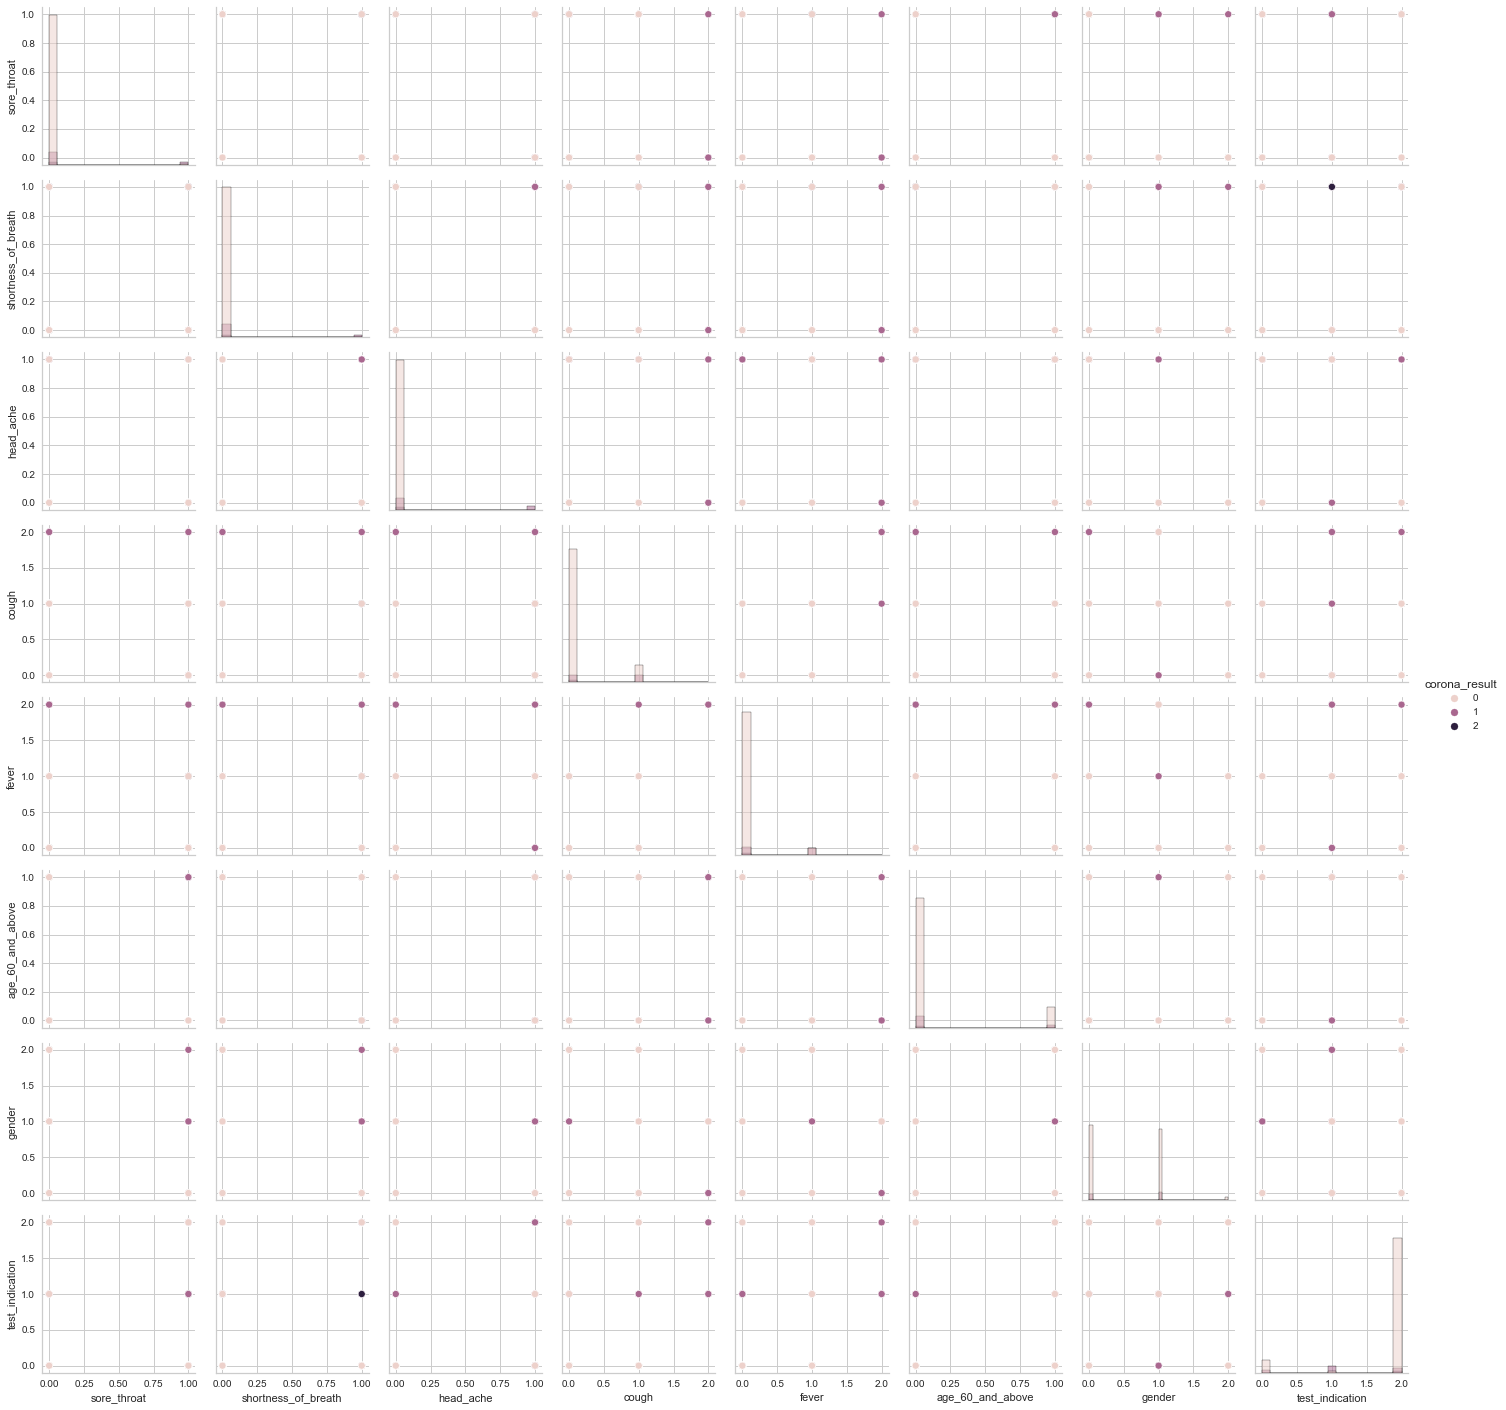

In [64]:
x_vars = ["sore_throat", "shortness_of_breath", "head_ache", "cough", "fever", "age_60_and_above", "gender", "test_indication"]
y_vars = ["corona_result"]
g = sns.PairGrid(test, hue='corona_result',x_vars=x_vars, y_vars=x_vars)
# g = sns.PairGrid(test, hue='corona_result')
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
# g.map(sns.scatterplot)
g.add_legend()

# one hot encoding

In [ ]:
data_dum = pd.get_dummies(metadata)
pd.DataFrame(data_dum)

In [53]:
data_dum.apply(pd.Series.value_counts)

sore_throat  shortness_of_breath  head_ache  cough_0   cough_1   \
0        53021                53189      52648      8070     45789   
1          822                  654       1195     45773      8054   

   cough_None  fever_0   fever_1   fever_None  corona_result_negative  \
0       53827      4811     49049       53826                    5618   
1          16     49032      4794          17                   48225   

   corona_result_other  corona_result_positive  age_60_and_above_No  \
0                53020                   49048                 7849   
1                  823                    4795                45994   

   age_60_and_above_Yes  gender_None  gender_female  gender_male  \
0                 45994        52649          27407        27630   
1                  7849         1194          26436        26213   

   test_indication_Abroad  test_indication_Contact with confirmed  \
0                   48802                                   50743   
1                    5041                                    3100   

   test_indication_Other  
0                   8141  
1                  45702

In [43]:
data_dum.isnull().sum()

sore_throat                               0
shortness_of_breath                       0
head_ache                                 0
cough_0                                   0
cough_1                                   0
cough_None                                0
fever_0                                   0
fever_1                                   0
fever_None                                0
corona_result_negative                    0
corona_result_other                       0
corona_result_positive                    0
age_60_and_above_No                       0
age_60_and_above_Yes                      0
gender_None                               0
gender_female                             0
gender_male                               0
test_indication_Abroad                    0
test_indication_Contact with confirmed    0
test_indication_Other                     0
dtype: int64

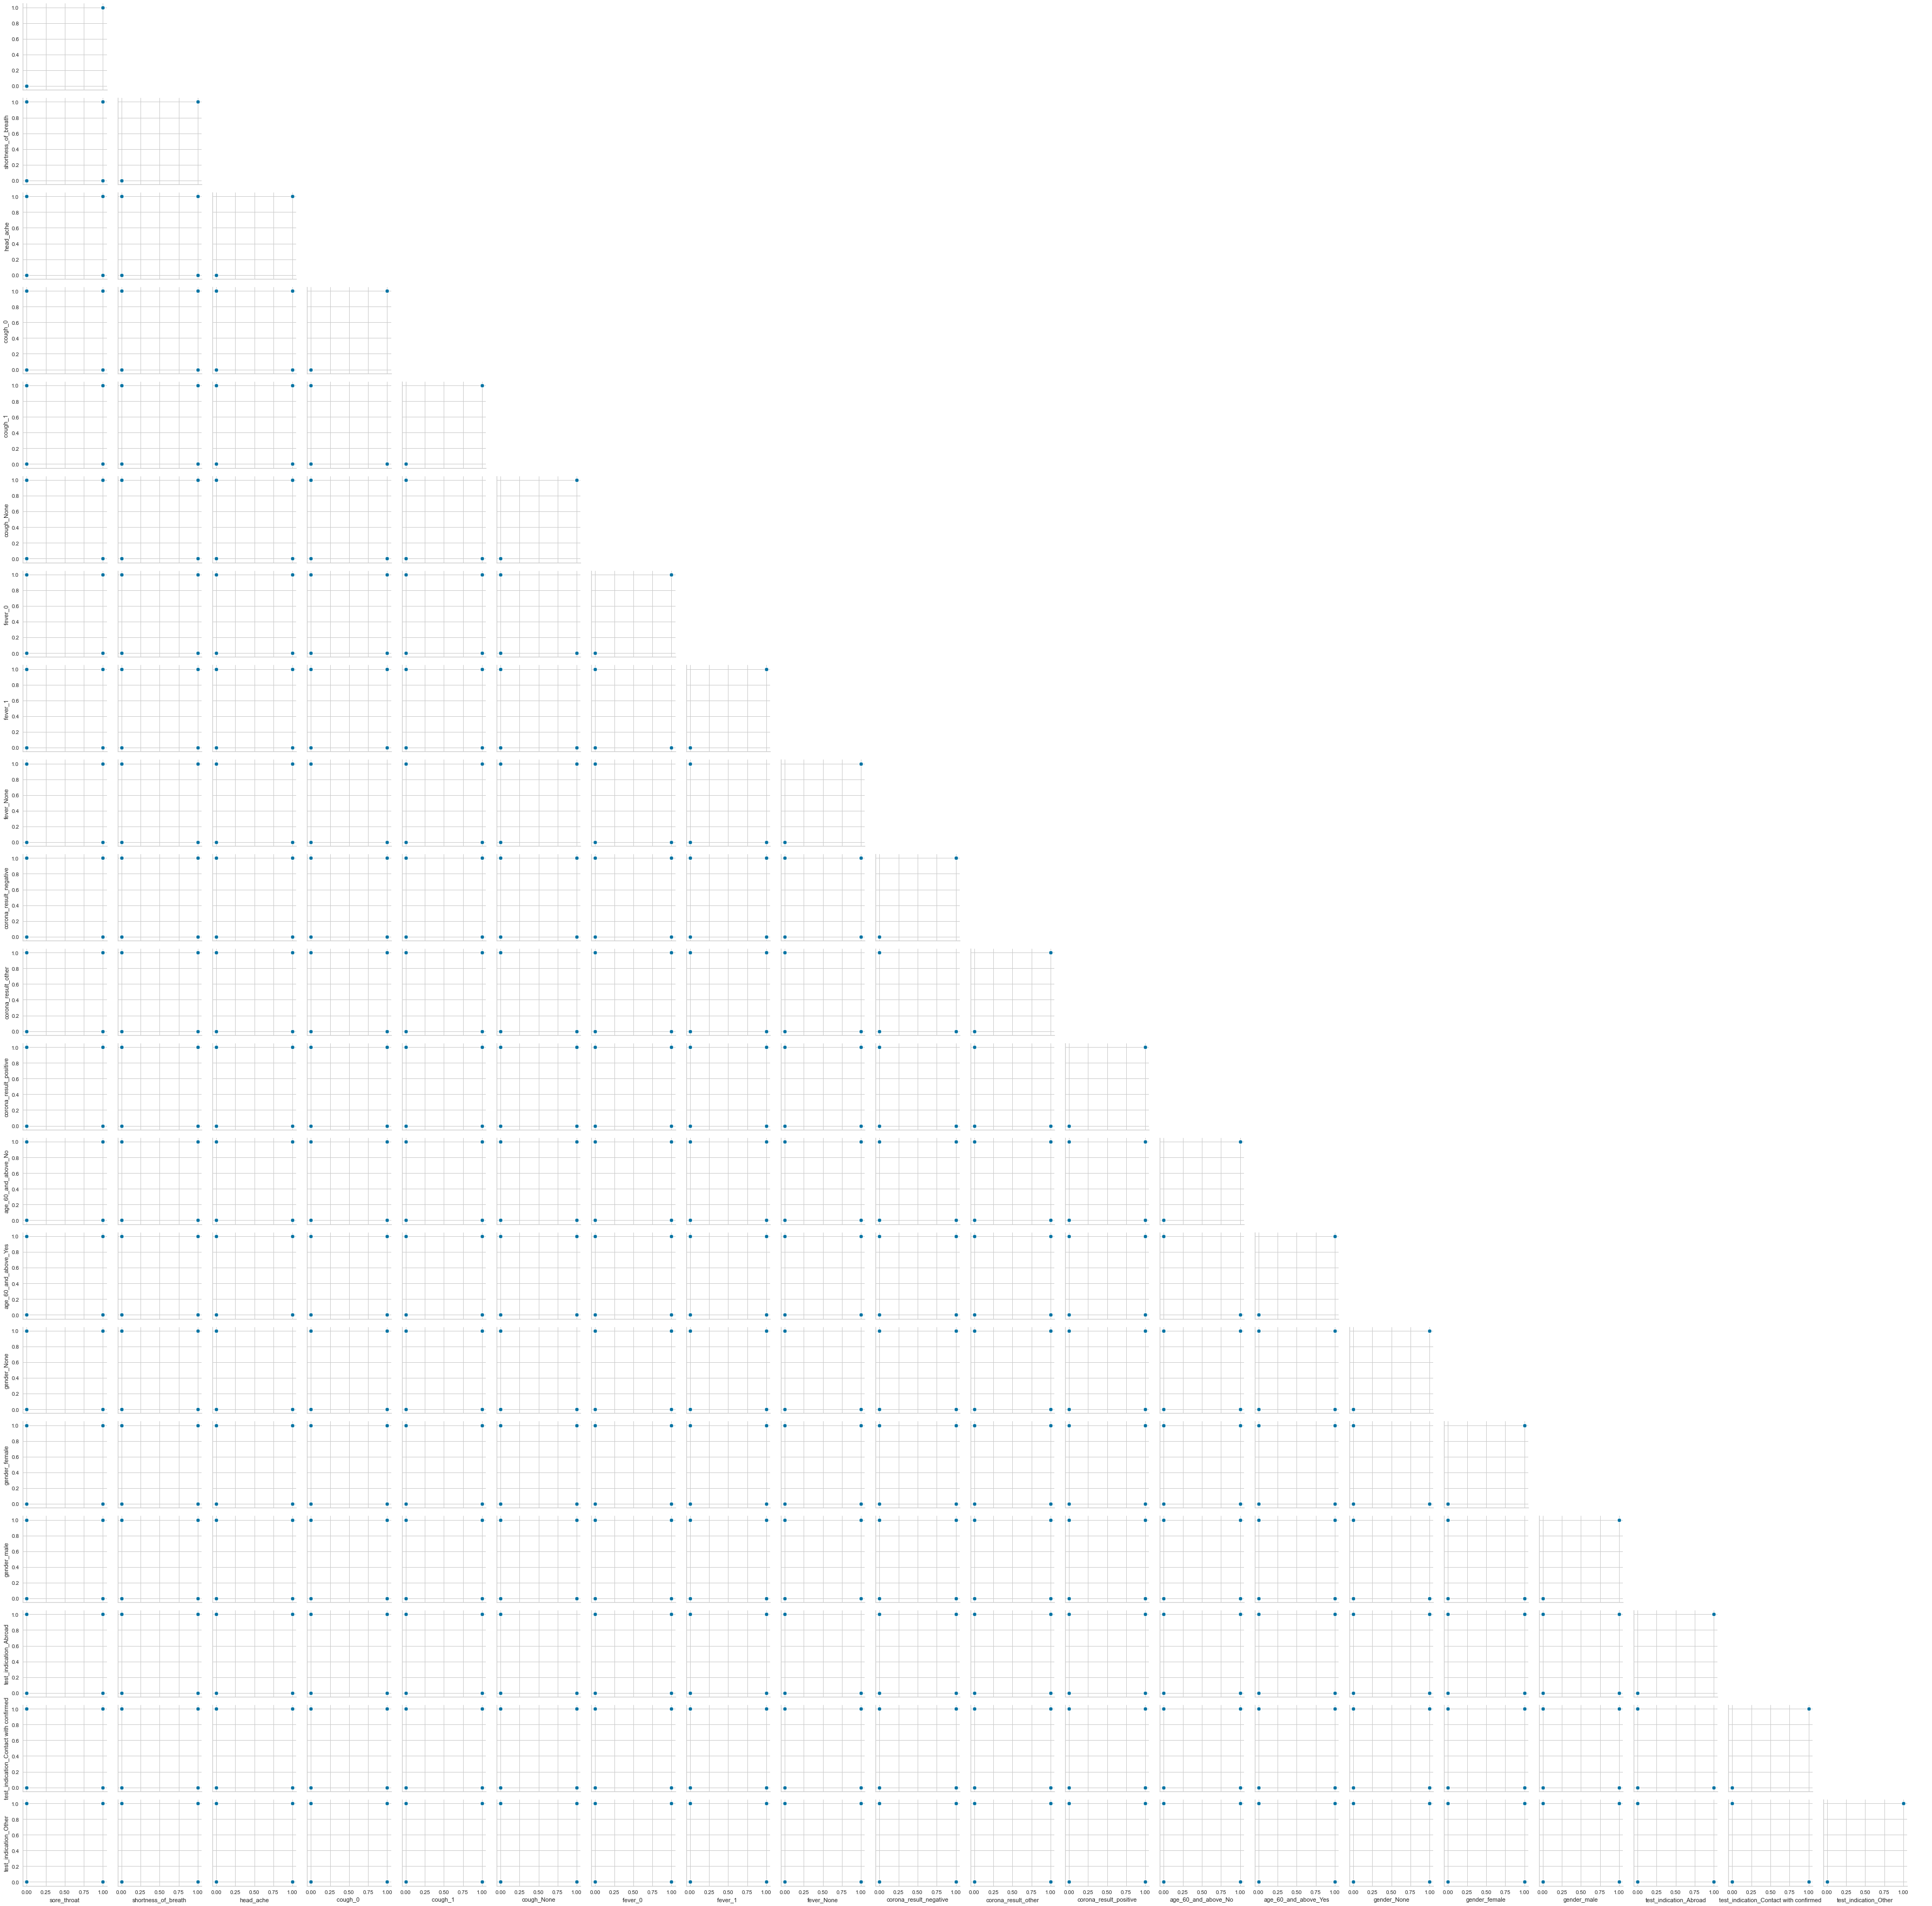

In [44]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(data_dum, corner=True)
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

# correlation

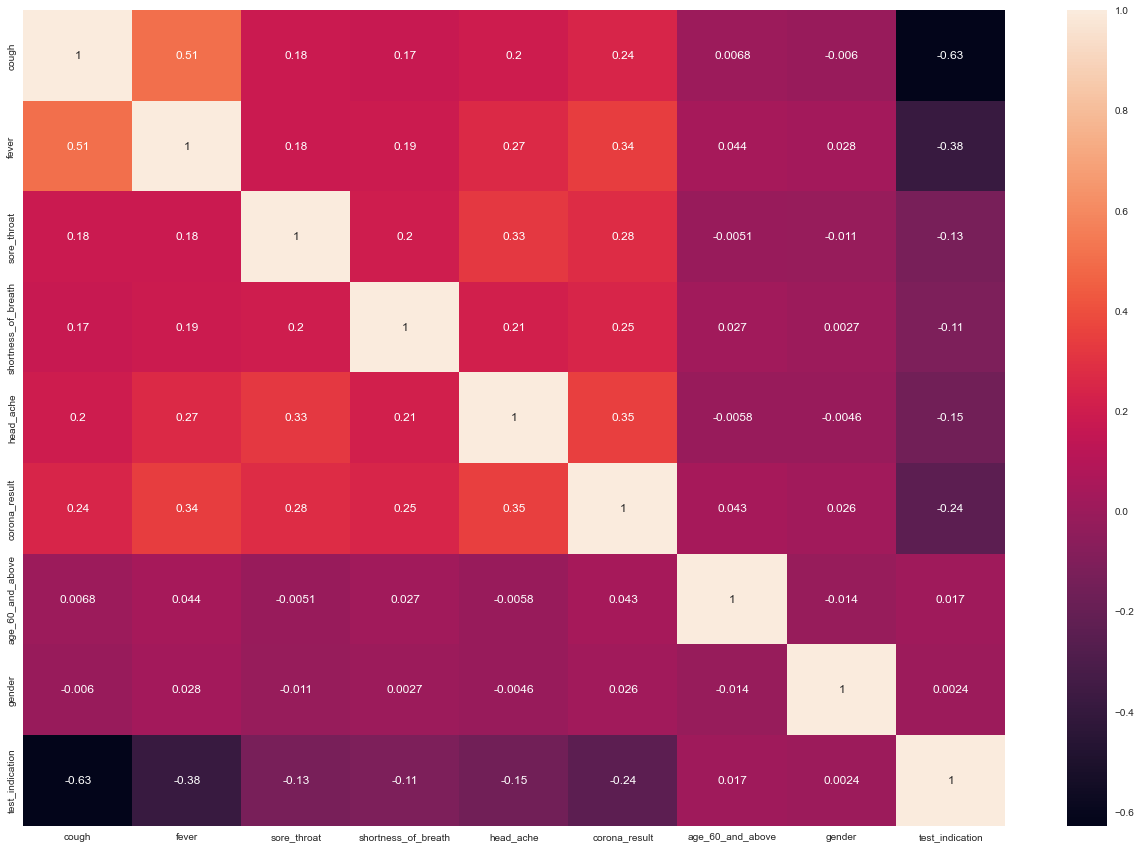

In [65]:
#Correlation Analysis
plt.figure(figsize=(22,15))
sns.heatmap(test.corr(), annot=True)
plt.show()

# KMeans

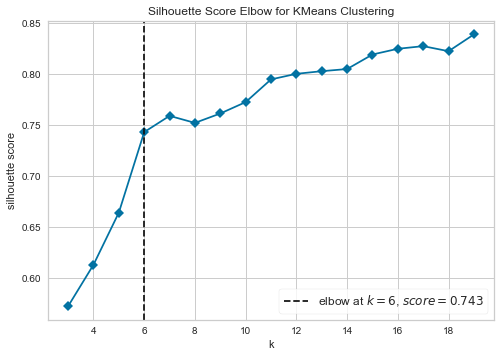

In [67]:
kmeans = KMeans()
kviz = KElbowVisualizer(kmeans, k=(3,20), metric='silhouette', timings=False)
kviz.fit(test)
kviz.show()
plt.show()

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

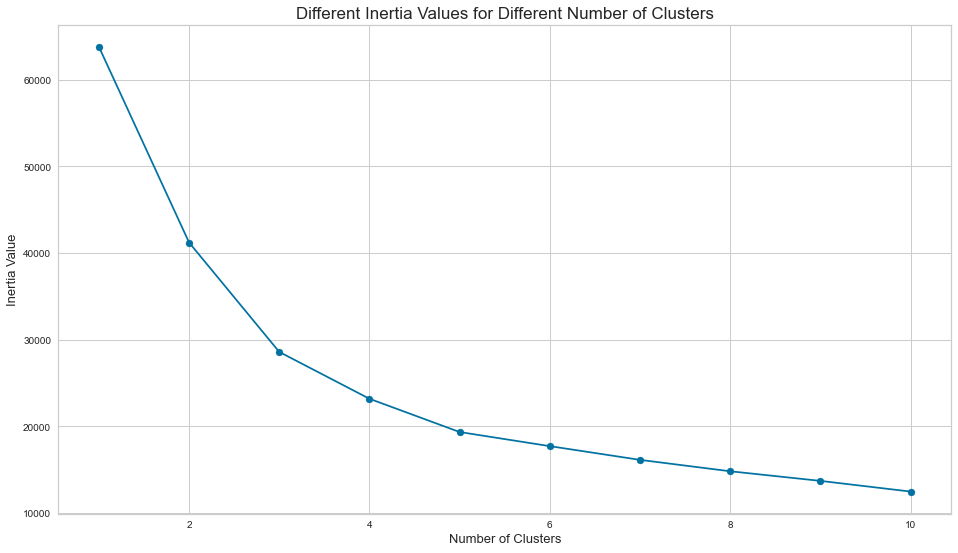

In [69]:
plt.rcParams['figure.figsize'] = [16,9]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++")
    kmeans_model.fit(test)
    inertia_list.append(kmeans_model.inertia_)
    
# plot the inertia curve
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

In [121]:
#Train the Model
kmeans = KMeans(n_clusters=6).fit(test)
test['cluster'] = kmeans.labels_

In [122]:
test.sort_values(by='cluster')

cough  fever  sore_throat  shortness_of_breath  head_ache  \
0          0      0            0                    0          0   
26375      0      0            0                    0          0   
26372      0      0            0                    0          0   
26370      0      0            0                    0          0   
26369      0      0            0                    0          0   
...      ...    ...          ...                  ...        ...   
51599      0      0            0                    0          0   
45317      0      0            0                    0          0   
13196      0      0            0                    0          0   
23739      0      0            0                    0          0   
12415      0      0            0                    0          0   

       corona_result  age_60_and_above  gender  test_indication  cluster  
0                  0                 0       1                2        0  
26375              0                 0       1                2        0  
26372              0                 0       1                2        0  
26370              0                 0       1                2        0  
26369              0                 0       1                2        0  
...              ...               ...     ...              ...      ...  
51599              0                 1       1                2        5  
45317              0                 1       1                2        5  
13196              0                 1       1                2        5  
23739              0                 1       1                2        5  
12415              0                 1       1                2        5  

[53843 rows x 10 columns]

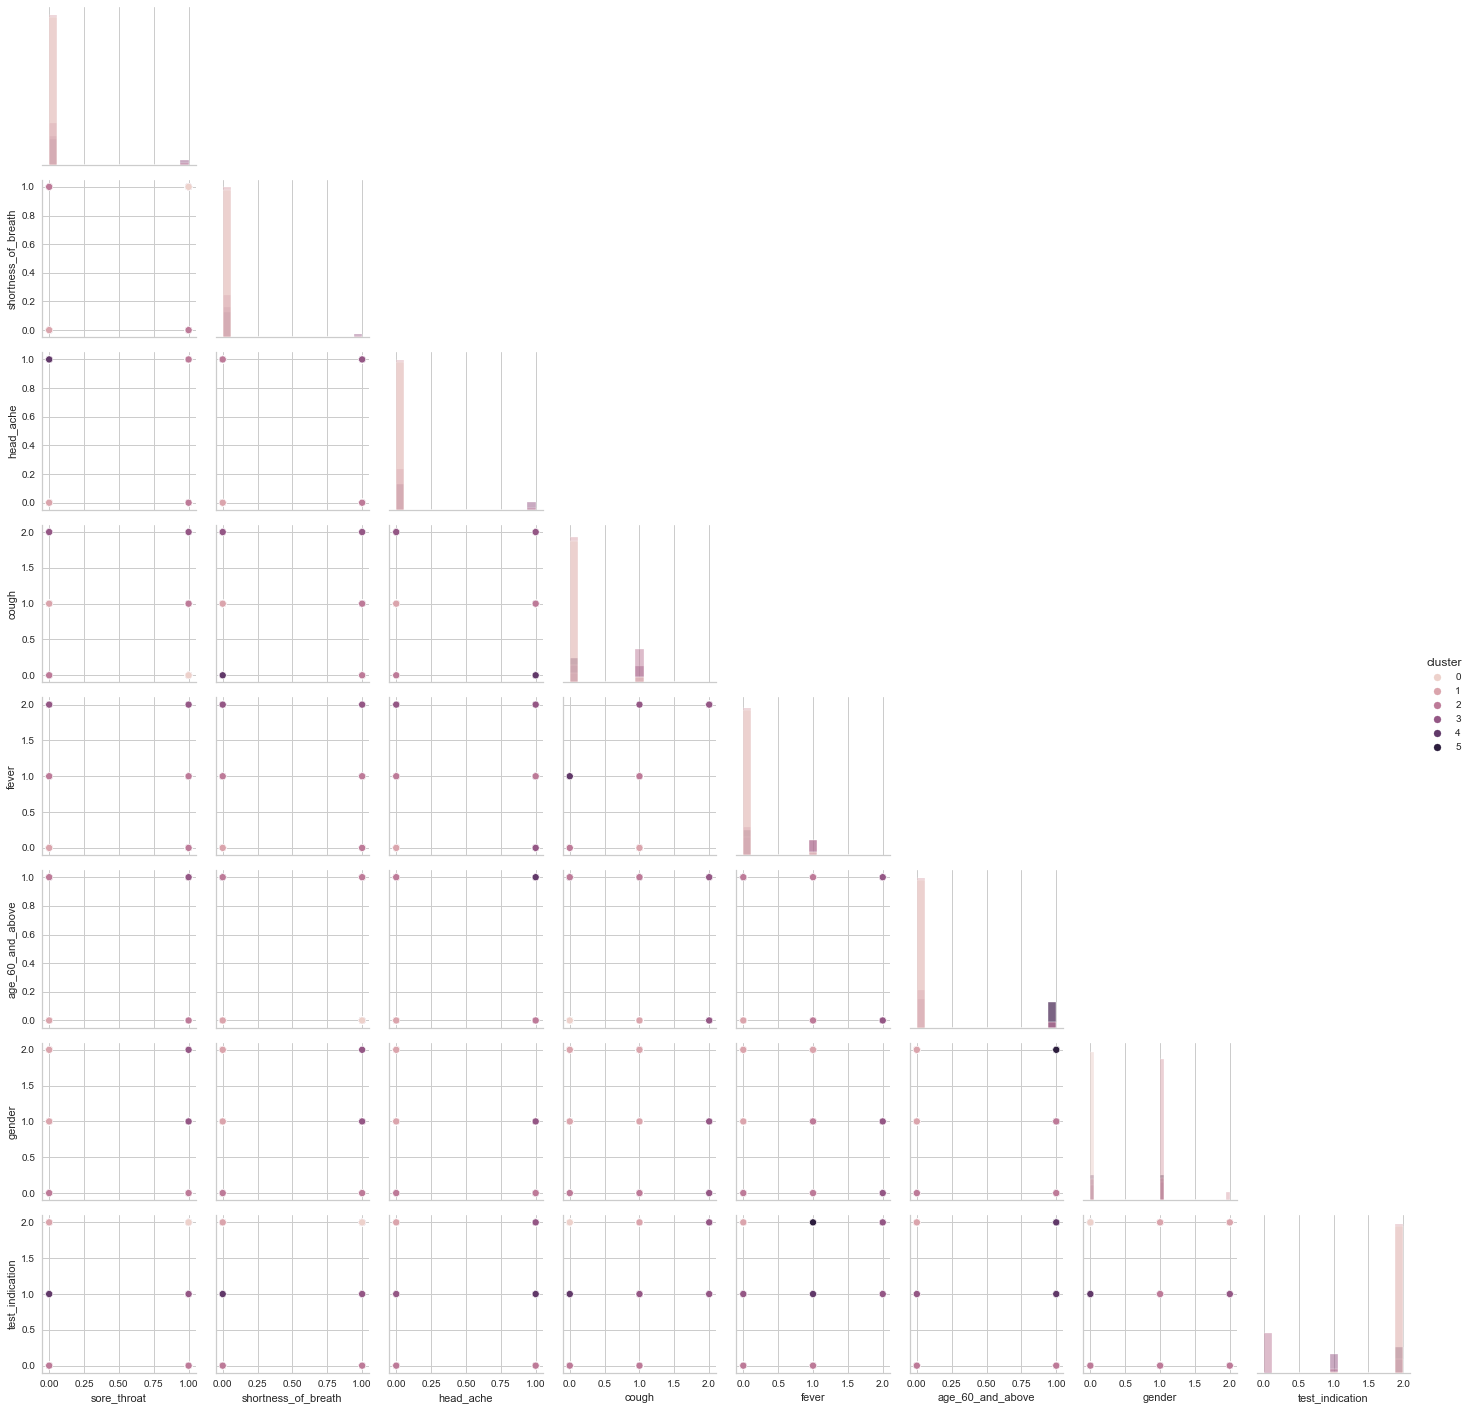

In [72]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(test, hue='cluster',x_vars=x_vars, y_vars=x_vars, corner=True)
# g = sns.PairGrid(test, hue='corona_result')
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

inertia: within cluster sum of squres, 各sample到各該群的centroid的距離之平方和，用來評估cluster的成效，越大代表越差

In [73]:
kmeans.inertia_

17728.2260687894

查看各cluster的中心，並在圖上畫出

In [74]:
kmeans.cluster_centers_

array([[ 3.94130877e-02,  2.01884974e-02,  6.96155082e-04,
         6.96155082e-04,  4.28403127e-04,  5.14083753e-03,
         1.11022302e-15,  1.43218770e-14,  1.99544822e+00],
       [ 3.36883172e-02,  1.87684521e-02,  3.16322227e-04,
         7.90805567e-04,  4.74483340e-04,  9.38422606e-03,
         1.16573418e-15,  1.05778153e+00,  1.99393716e+00],
       [ 7.84270489e-01,  3.41969864e-01,  3.21572951e-02,
         2.55420801e-02,  4.00588019e-02,  1.63542815e-01,
         1.21462698e-01,  5.26093348e-01,  8.45277472e-02],
       [ 4.86029584e-01,  4.63723879e-01,  1.44869688e-01,
         1.11058934e-01,  2.23057056e-01,  1.19112468e+00,
         1.61540268e-01,  5.56938248e-01,  1.40972059e+00],
       [ 6.47948164e-02,  3.76427029e-02,  1.85128047e-03,
         1.85128047e-03,  1.54273372e-03,  1.97469917e-02,
         1.00000000e+00, -1.66533454e-15,  1.99444616e+00],
       [ 5.00153421e-02,  4.20374348e-02,  1.53421295e-03,
         2.45474072e-03,  1.53421295e-03,  4.295796

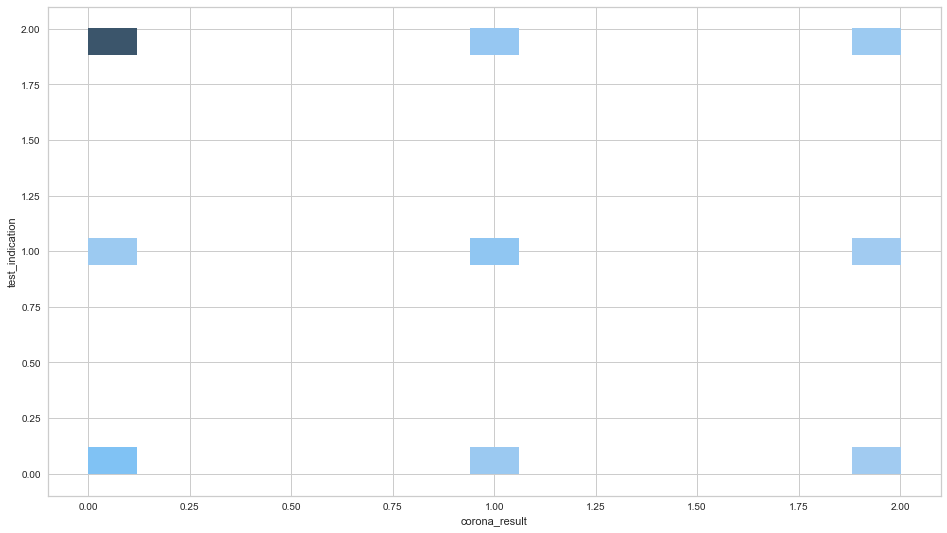

In [203]:
# ax = sns.scatterplot(data= test, x='corona_result', y='test_indication', legend=False,  hue=kmeans.labels_, alpha=0.4, s=100)
ax = sns.histplot(data= test, x='corona_result', y='test_indication', legend=True)
# ax = sns.scatterplot(kmeans.cluster_centers_[:, 5], kmeans.cluster_centers_[:, 8],
#                      hue=range(6), s=300,marker='*', ec='black', legend=False, ax=ax)
# ax.legend()

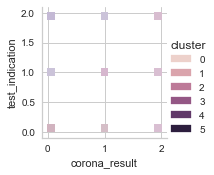

In [199]:
g = sns.PairGrid(test, hue='cluster', x_vars='corona_result', y_vars='test_indication')
g.map(sns.histplot)
g.add_legend()

In [181]:
def show_centers(x, y, centers, color, label):
    x_col = test.columns.get_loc(x.name)
    if y is None: # for the histograms
        plt.axvline(centers[label, x_col], color='r', ls=':')
    else:
        y_col = test.columns.get_loc(y.name)
        plt.scatter(centers[label, x_col], centers[label, y_col], marker='*', color='r', s=50)

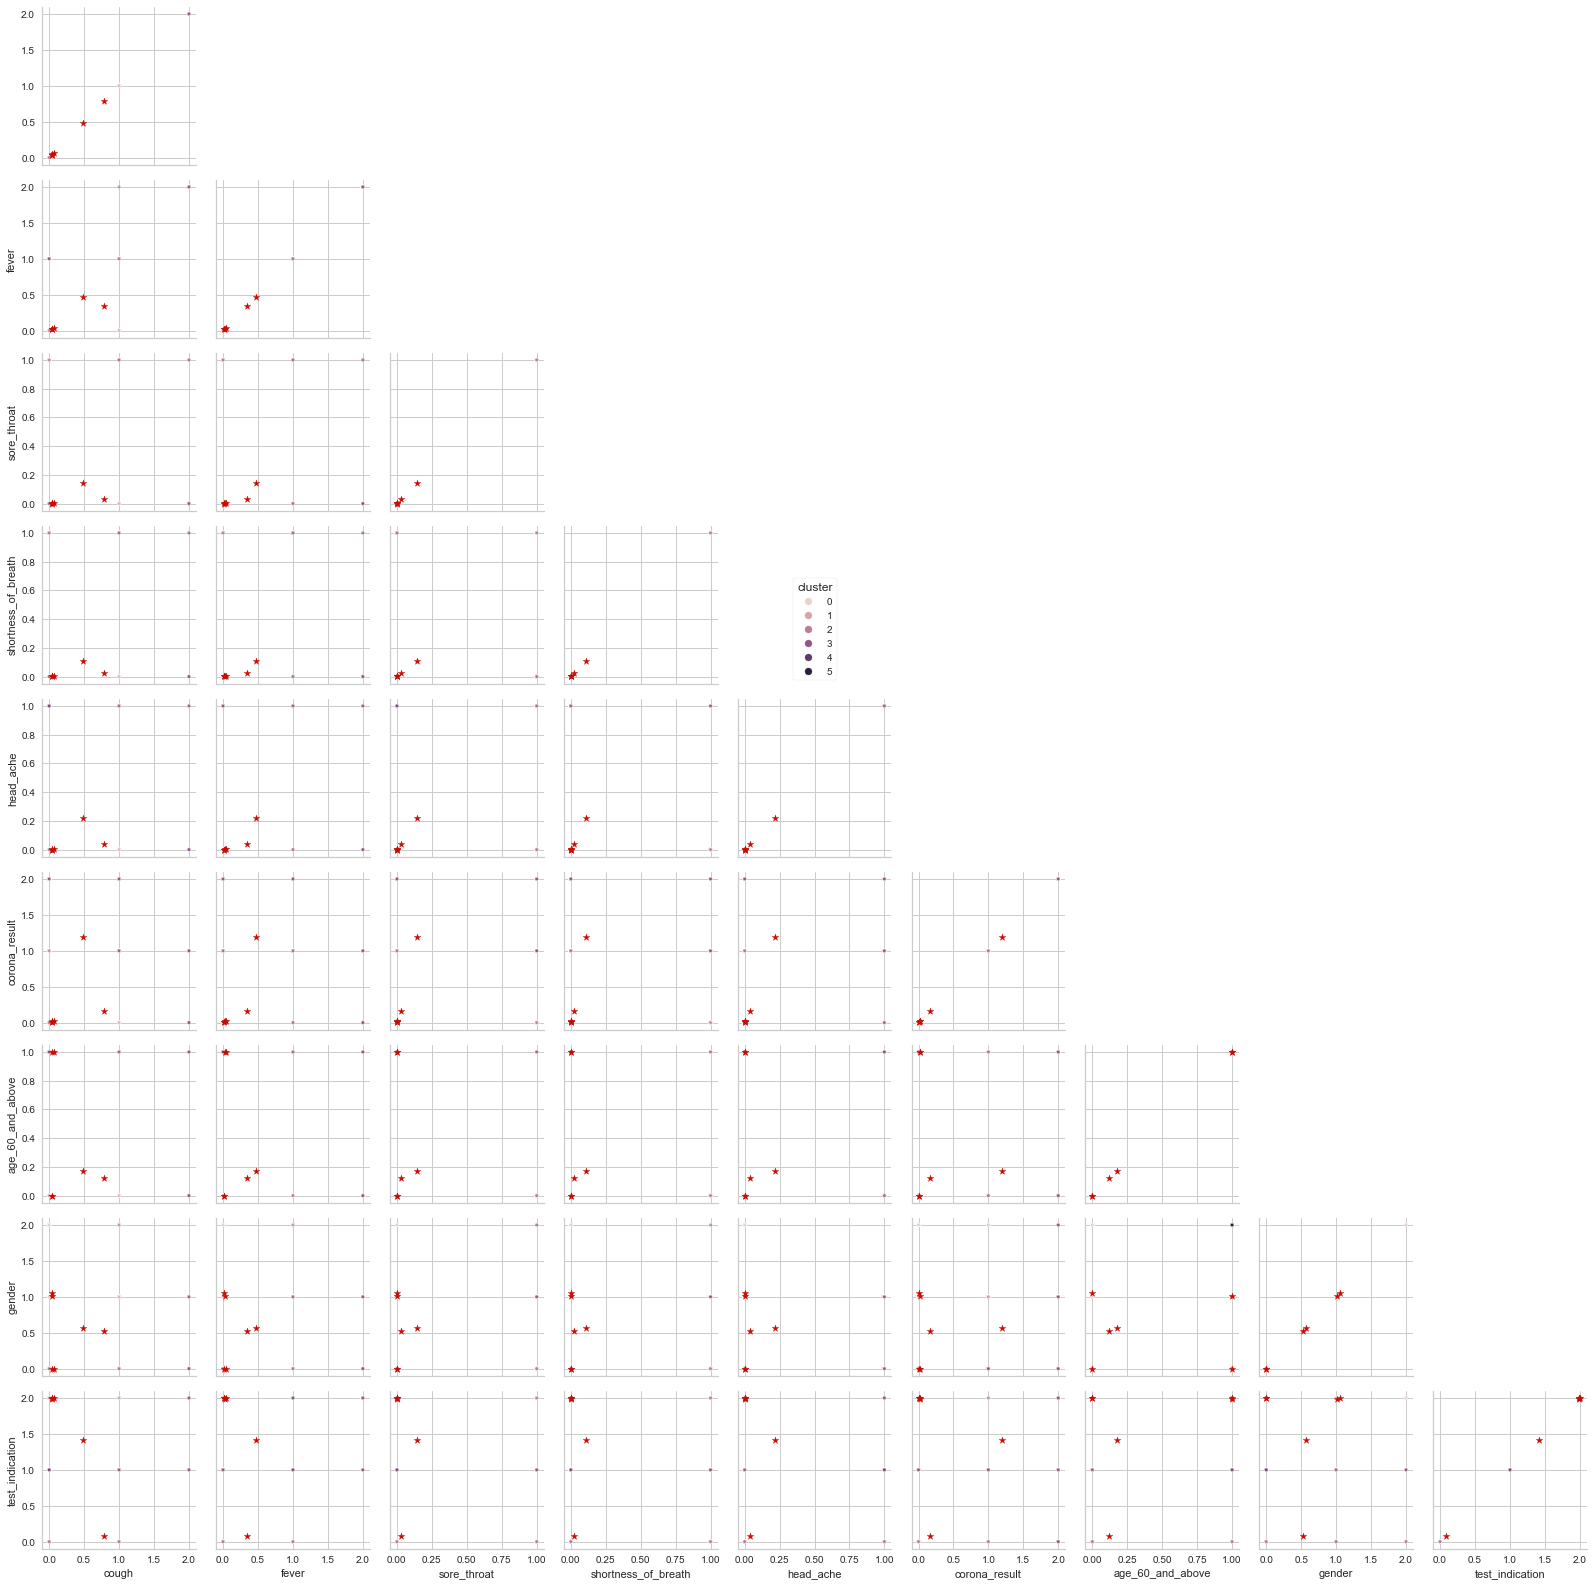

In [182]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(test, hue="cluster", corner=True)
g.map(sns.scatterplot, marker='.', alpha=0.5)
g.map(show_centers, centers=kmeans.cluster_centers_)
# g.map(sns.scatterplot(alpha=0.5))
# g.map(sns.scatterplot(data=kmeans.cluster_centers_, s=200,marker='*', ec='black', legend=False))
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend(frameon=True, bbox_to_anchor=(.5, .6), loc='center', title='cluster')

In [166]:
all=test.copy()
all.drop(['cluster'],axis=1,  inplace=True)
all.insert(0, 'counts', len(all.index))
all=all.mean(axis=0)
all

counts                 53843.000000
cough                      0.150177
fever                      0.089668
sore_throat                0.015267
shortness_of_breath        0.012146
head_ache                  0.022194
corona_result              0.119626
age_60_and_above           0.145776
gender                     0.531193
test_indication            1.755177
dtype: float64

In [165]:
def cluster(metadata, data, num):
    cluster=metadata[metadata['cluster']==num]
    cluster.insert(0, 'counts',len(cluster.index))
    cluster=cluster.mean(axis=0)
    data=pd.concat([data, cluster], axis=1, join='inner')
    return data

In [167]:
for i in range(6):
    all= cluster(test, all, i)

In [168]:
all

0             1             0            0  \
counts               53843.000000  18968.000000  18674.000000  5442.000000   
cough                    0.150177      0.033688      0.039413     0.784270   
fever                    0.089668      0.018768      0.020188     0.341970   
sore_throat              0.015267      0.000316      0.000696     0.032157   
shortness_of_breath      0.012146      0.000791      0.000696     0.025542   
head_ache                0.022194      0.000474      0.000428     0.040059   
corona_result            0.119626      0.009384      0.005141     0.163543   
age_60_and_above         0.145776      0.000000      0.000000     0.121463   
gender                   0.531193      1.057782      0.000000     0.526093   
test_indication          1.755177      1.993937      1.995448     0.084528   

                               0            0            0  
counts               4324.000000  3241.000000  3194.000000  
cough                   0.482886     0.064795     0.045398  
fever                   0.467623     0.037643     0.028178  
sore_throat             0.142692     0.001851     0.001565  
shortness_of_breath     0.109389     0.001851     0.002505  
head_ache               0.219704     0.001543     0.001565  
corona_result           1.188252     0.019747     0.023482  
age_60_and_above        0.174144     1.000000     1.000000  
gender                  0.563599     0.000000     1.013463  
test_indication         1.418594     1.994446     1.991860

In [169]:
all.columns=['all', 'cluser 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5']
all

all      cluser 0     cluster 1    cluster 2  \
counts               53843.000000  18968.000000  18674.000000  5442.000000   
cough                    0.150177      0.033688      0.039413     0.784270   
fever                    0.089668      0.018768      0.020188     0.341970   
sore_throat              0.015267      0.000316      0.000696     0.032157   
shortness_of_breath      0.012146      0.000791      0.000696     0.025542   
head_ache                0.022194      0.000474      0.000428     0.040059   
corona_result            0.119626      0.009384      0.005141     0.163543   
age_60_and_above         0.145776      0.000000      0.000000     0.121463   
gender                   0.531193      1.057782      0.000000     0.526093   
test_indication          1.755177      1.993937      1.995448     0.084528   

                       cluster 3    cluster 4    cluster 5  
counts               4324.000000  3241.000000  3194.000000  
cough                   0.482886     0.064795     0.045398  
fever                   0.467623     0.037643     0.028178  
sore_throat             0.142692     0.001851     0.001565  
shortness_of_breath     0.109389     0.001851     0.002505  
head_ache               0.219704     0.001543     0.001565  
corona_result           1.188252     0.019747     0.023482  
age_60_and_above        0.174144     1.000000     1.000000  
gender                  0.563599     0.000000     1.013463  
test_indication         1.418594     1.994446     1.991860

# as_preprocessing

In [208]:
from sklearn.model_selection import train_test_split

from sklearn import metrics, ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from collections import Counter

## all_features

In [206]:
y=test.corona_result

features_all=['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender', 'test_indication', 'cluster']
X_all =test[features_all]

In [207]:
X_resampled_all_re, y_resampled_all_re = SMOTE().fit_resample(X_all, y)
print(sorted(Counter(y_resampled_all_re).items()))

[(0, 48225), (1, 48225), (2, 48225)]


## filtered_features

In [209]:
features_filter=['cough', 'fever', 'age_60_and_above', 'gender', 'test_indication', 'cluster']
X_filter =test[features_filter]

In [210]:
X_resampled_filter_re, y_resampled_filter_re = SMOTE().fit_resample(X_filter, y)
print(sorted(Counter(y_resampled_filter_re).items()))

[(0, 48225), (1, 48225), (2, 48225)]


## train_test_split

### all_features

In [211]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_resampled_all_re, y_resampled_all_re, test_size=0.2, random_state=2022)

In [212]:
X_test_all

cough  fever  sore_throat  shortness_of_breath  head_ache  \
90881       0      1            0                    0          1   
83949       0      0            0                    0          0   
113136      0      0            0                    0          0   
92990       1      0            0                    0          0   
36970       0      0            0                    0          0   
...       ...    ...          ...                  ...        ...   
124611      0      0            0                    0          0   
97648       0      0            0                    0          0   
79664       1      0            1                    0          0   
134437      0      0            0                    0          0   
35461       0      0            0                    0          0   

        age_60_and_above  gender  test_indication  cluster  
90881                  0       1                1        3  
83949                  1       0                1        3  
113136                 0       0                2        3  
92990                  1       1                2        3  
36970                  0       1                2        0  
...                  ...     ...              ...      ...  
124611                 0       0                2        3  
97648                  0       1                2        3  
79664                  0       1                1        3  
134437                 1       0                2        3  
35461                  0       1                2        0  

[28935 rows x 9 columns]

### filtered_features

In [213]:
X_train_filter, X_test_filter, y_train_filter, y_test_filter = train_test_split(X_resampled_filter_re, y_resampled_filter_re, test_size=0.2, random_state=2022)

## XGBoost

### XGBoost(all)

In [214]:
xgb_all = XGBClassifier(learning_rate=0.1,
                      n_estimators=20,           # 树的个数-10棵树建立xgboost
                      max_depth=10,               # 树的深度
                      min_child_weight = 1,      # 叶子节点最小权重
                      gamma=0.,                  # 惩罚项中叶子结点个数前的参数
                      subsample=1,               # 所有样本建立决策树
                      colsample_btree=1,         # 所有特征建立决策树
                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
                      random_state=42,           # 随机数
                      slient = 0
                      )
# xgb_all=XGBClassifier()
xgb_all.fit(X_train_all,y_train_all)

c:\Users\betty\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:30:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_btree=1,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, slient=0,
              subsample=1, tree_method='exact', validate_parameters=1, ...)

In [215]:
model_type="XGBoost (all) SMOTE"
predicted_all = xgb_all.predict(X_test_all)
predicted_prob_all = xgb_all.predict_proba(X_test_all)

# accuracy=accuracy_score(y_test, predicted)
# confusion=confusion_matrix(y_test, predicted)

# print("Accurracy: ", accuracy)
# print("Confusion Matrix: ", confusion)

#### False Negative

In [216]:
result=X_test_all.copy()
result["corona_result"]=y_test_all
X_test_all

cough  fever  sore_throat  shortness_of_breath  head_ache  \
90881       0      1            0                    0          1   
83949       0      0            0                    0          0   
113136      0      0            0                    0          0   
92990       1      0            0                    0          0   
36970       0      0            0                    0          0   
...       ...    ...          ...                  ...        ...   
124611      0      0            0                    0          0   
97648       0      0            0                    0          0   
79664       1      0            1                    0          0   
134437      0      0            0                    0          0   
35461       0      0            0                    0          0   

        age_60_and_above  gender  test_indication  cluster  
90881                  0       1                1        3  
83949                  1       0                1        3  
113136                 0       0                2        3  
92990                  1       1                2        3  
36970                  0       1                2        0  
...                  ...     ...              ...      ...  
124611                 0       0                2        3  
97648                  0       1                2        3  
79664                  0       1                1        3  
134437                 1       0                2        3  
35461                  0       1                2        0  

[28935 rows x 9 columns]

In [217]:
result["xgb_all"]=predicted_all
result

cough  fever  sore_throat  shortness_of_breath  head_ache  \
90881       0      1            0                    0          1   
83949       0      0            0                    0          0   
113136      0      0            0                    0          0   
92990       1      0            0                    0          0   
36970       0      0            0                    0          0   
...       ...    ...          ...                  ...        ...   
124611      0      0            0                    0          0   
97648       0      0            0                    0          0   
79664       1      0            1                    0          0   
134437      0      0            0                    0          0   
35461       0      0            0                    0          0   

        age_60_and_above  gender  test_indication  cluster  corona_result  \
90881                  0       1                1        3              1   
83949                  1       0                1        3              1   
113136                 0       0                2        3              2   
92990                  1       1                2        3              1   
36970                  0       1                2        0              0   
...                  ...     ...              ...      ...            ...   
124611                 0       0                2        3              2   
97648                  0       1                2        3              2   
79664                  0       1                1        3              1   
134437                 1       0                2        3              2   
35461                  0       1                2        0              0   

        xgb_all  
90881         1  
83949         1  
113136        2  
92990         1  
36970         0  
...         ...  
124611        2  
97648         2  
79664         1  
134437        2  
35461         0  

[28935 rows x 11 columns]

In [218]:
xgb_all_fn=result[(result['corona_result']==1) & (result['xgb_all']==0)]
xgb_all_fn.apply(pd.Series.value_counts)

cough  fever  sore_throat  shortness_of_breath  head_ache  \
0  700.0  965.0       1012.0               1012.0     1012.0   
1  311.0   46.0          NaN                  NaN        NaN   
2    1.0    1.0          NaN                  NaN        NaN   
3    NaN    NaN          NaN                  NaN        NaN   
4    NaN    NaN          NaN                  NaN        NaN   
5    NaN    NaN          NaN                  NaN        NaN   

   age_60_and_above  gender  test_indication  cluster  corona_result  xgb_all  
0             807.0   415.0            289.0      340            NaN   1012.0  
1             205.0   572.0              NaN      196         1012.0      NaN  
2               NaN    25.0            723.0      289            NaN      NaN  
3               NaN     NaN              NaN        1            NaN      NaN  
4               NaN     NaN              NaN       77            NaN      NaN  
5               NaN     NaN              NaN      109            NaN      NaN

#### False Positive

In [219]:
xgb_all_fp=result[(result['corona_result']==0) & (result['xgb_all']==1)]
xgb_all_fp.apply(pd.Series.value_counts)

cough  fever  sore_throat  shortness_of_breath  head_ache  \
0  160.0  150.0        304.0                306.0      306.0   
1  149.0  159.0          5.0                  3.0        3.0   
2    NaN    NaN          NaN                  NaN        NaN   
4    NaN    NaN          NaN                  NaN        NaN   

   age_60_and_above  gender  test_indication  cluster  corona_result  xgb_all  
0             239.0    96.0            307.0      NaN          309.0      NaN  
1              70.0   213.0              1.0      NaN            NaN    309.0  
2               NaN     NaN              1.0    307.0            NaN      NaN  
4               NaN     NaN              NaN      2.0            NaN      NaN

Accuracy: 0.92
Auc: 0.98
Detail:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      9580
           1       0.87      0.88      0.88      9703
           2       0.99      0.90      0.94      9652

    accuracy                           0.92     28935
   macro avg       0.92      0.92      0.92     28935
weighted avg       0.92      0.92      0.92     28935



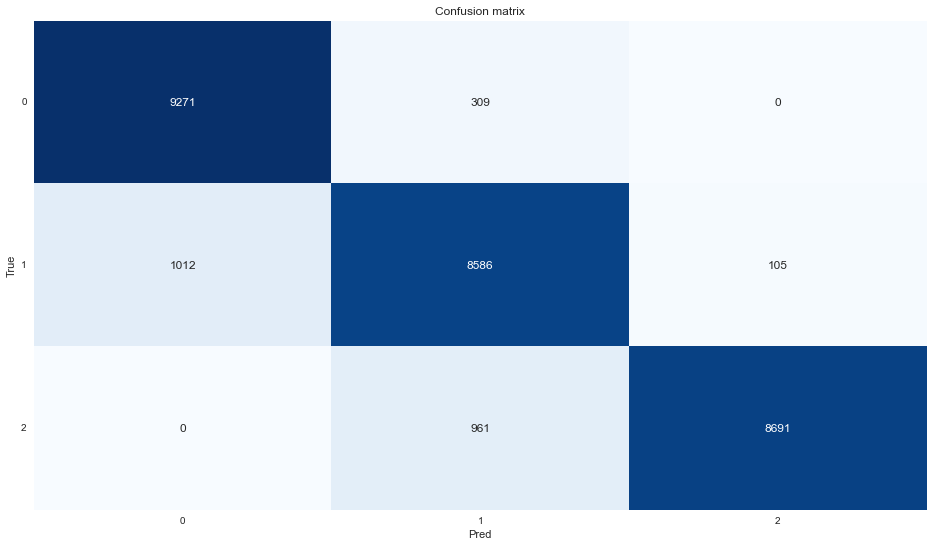

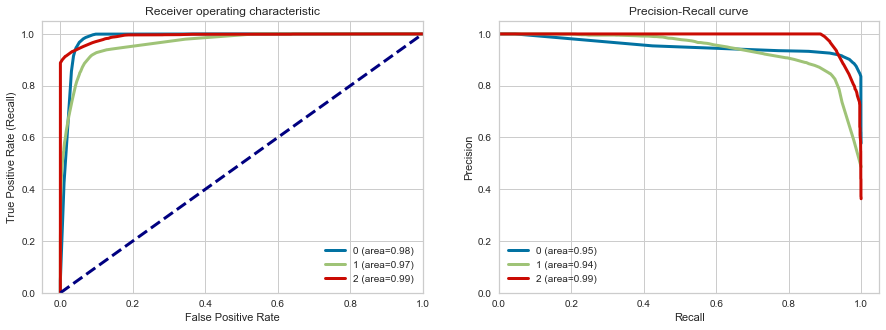

In [225]:
classes = np.unique(y_test_all)
y_test_array = pd.get_dummies(y_test_all, drop_first=False).values

## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test_all, predicted_all)
auc = metrics.roc_auc_score(y_test_array, predicted_prob_all, 
                            multi_class="ovr")
f1=f1_score(y_test_all, predicted_all, average='weighted')
precision_all=precision_score(y_test_all, predicted_all, average='weighted')
recall_all=recall_score(y_test_all, predicted_all, average='weighted')
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test_all, predicted_all))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test_all, predicted_all)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

## Plot roc
roc_auc_dict = {}
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob_all[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    ax[0].plot(fpr, tpr, lw=3, 
            #   label='{0} (area={1:0.2f})'.format(classes[i], 
            #                   metrics.auc(fpr, tpr))
                label='{0} (area={1:0.2f})'.format(classes[i], roc_auc)
               )
    roc_auc_dict[classes[i]] = {"fpr":fpr,"tpr": tpr, "roc_auc": roc_auc} 
    
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob_all[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

# 3. Hierarchical Clustering

In [24]:
hc=sch.linkage(metadata, metric='euclidean', method='ward')

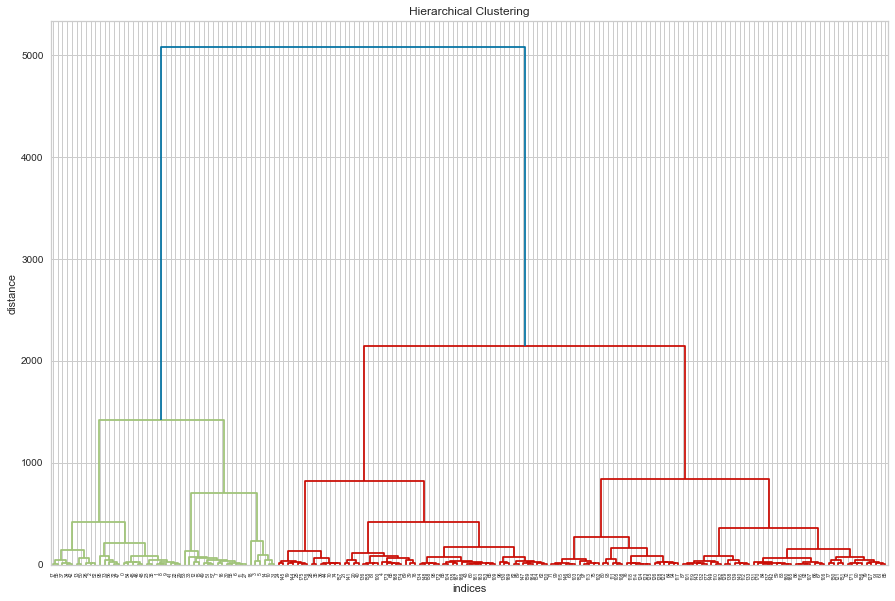

In [25]:
plt.figure(figsize = (15, 10))
sch.dendrogram(hc)
plt.title('Hierarchical Clustering')
plt.xlabel('indices')
plt.ylabel('distance')
plt.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 1416.683338108347, 1416.683338108347, 0.0],
  [0.0, 2141.8849632509896, 2141.8849632509896, 0.0],
  [1416.683338108347,
   5078.327147402943,
   5078.327147402943,
   2141.8849632509896]],
 'ivl': ['(28)', '(20)', '(58)', '(72)'],
 'leaves': [347, 349, 350, 351],
 'color_list': ['C1', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C2', 'C2']}

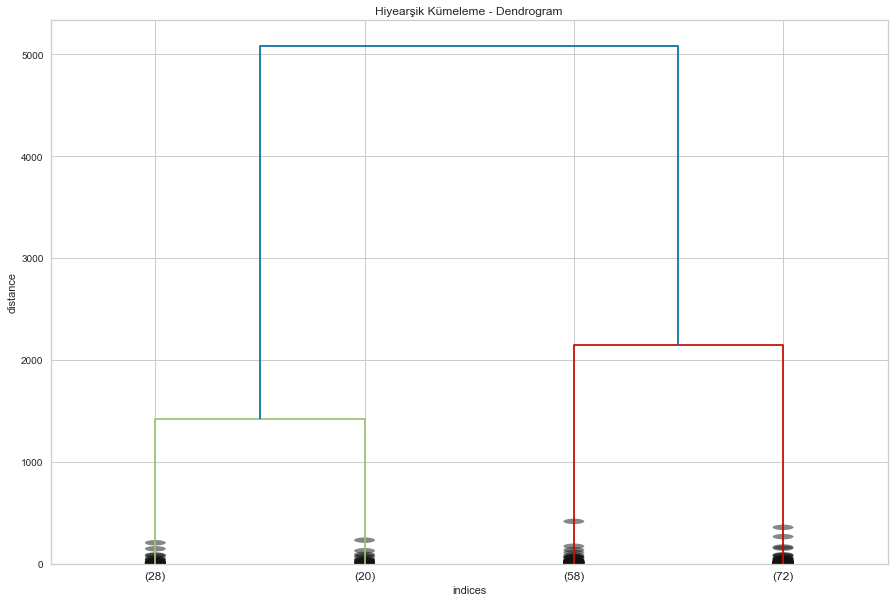

In [26]:
plt.figure(figsize = (15, 10))
plt.title("Hiyearşik Kümeleme - Dendrogram")
plt.xlabel('indices')
plt.ylabel('distance')
sch.dendrogram(hc,
          truncate_mode="lastp",
          p = 4,
          show_contracted=True)

In [27]:
hierarchical  = AgglomerativeClustering(n_clusters = 4,
                                  affinity= "euclidean",
                                  linkage = "ward").fit_predict(metadata)

In [28]:
dfff = metadata.copy()
dfff["Clusters for Hierarchical"] = hierarchical
dfff[0:5]

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  cluster  Clusters for Hierarchical  
0   3.92     1065        1                          3  
1   3.40     1050        1                          3  
2   3.17     1185        1                          3  
3   3.45     1480        1                          1  
4   2.93      735        0                          2

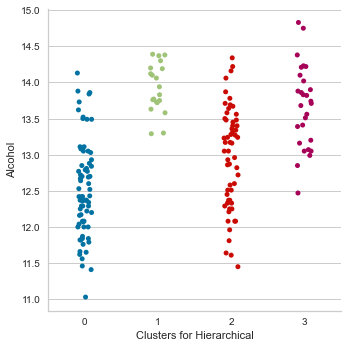

In [29]:
sns.catplot(x = "Clusters for Hierarchical", y = "Alcohol", data = dfff)

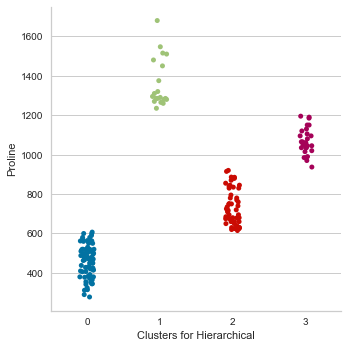

In [30]:
sns.catplot(x = "Clusters for Hierarchical", y = "Proline", data = dfff)

# KMedoids

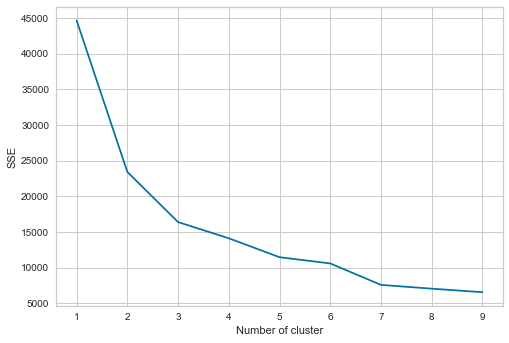

In [31]:
sse = {} 

# for k in range(1, 10):
#     kmedo = KMedoids(n_clusters=k, max_iter=1000, random_state=1).fit(metadata)
#     sse[k] = kmedo.inertia_

for k in range(1, 10):
    kmedo = KMedoids(n_clusters=k).fit(metadata)
    sse[k] = kmedo.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [32]:
#Train the Model
kmedoids = KMedoids(n_clusters=3).fit(metadata)
kmed=metadata.copy()
kmed['cluster'] = kmedoids.labels_

In [33]:
kmedoids.inertia_

16376.995508110507

In [34]:
kmedoids.cluster_centers_

array([[1.260e+01, 2.460e+00, 2.200e+00, 1.850e+01, 9.400e+01, 1.620e+00,
        6.600e-01, 6.300e-01, 9.400e-01, 7.100e+00, 7.300e-01, 1.580e+00,
        6.950e+02, 0.000e+00],
       [1.349e+01, 1.660e+00, 2.240e+00, 2.400e+01, 8.700e+01, 1.880e+00,
        1.840e+00, 2.700e-01, 1.030e+00, 3.740e+00, 9.800e-01, 2.780e+00,
        4.720e+02, 2.000e+00],
       [1.383e+01, 1.570e+00, 2.620e+00, 2.000e+01, 1.150e+02, 2.950e+00,
        3.400e+00, 4.000e-01, 1.720e+00, 6.600e+00, 1.130e+00, 2.570e+00,
        1.130e+03, 1.000e+00]])

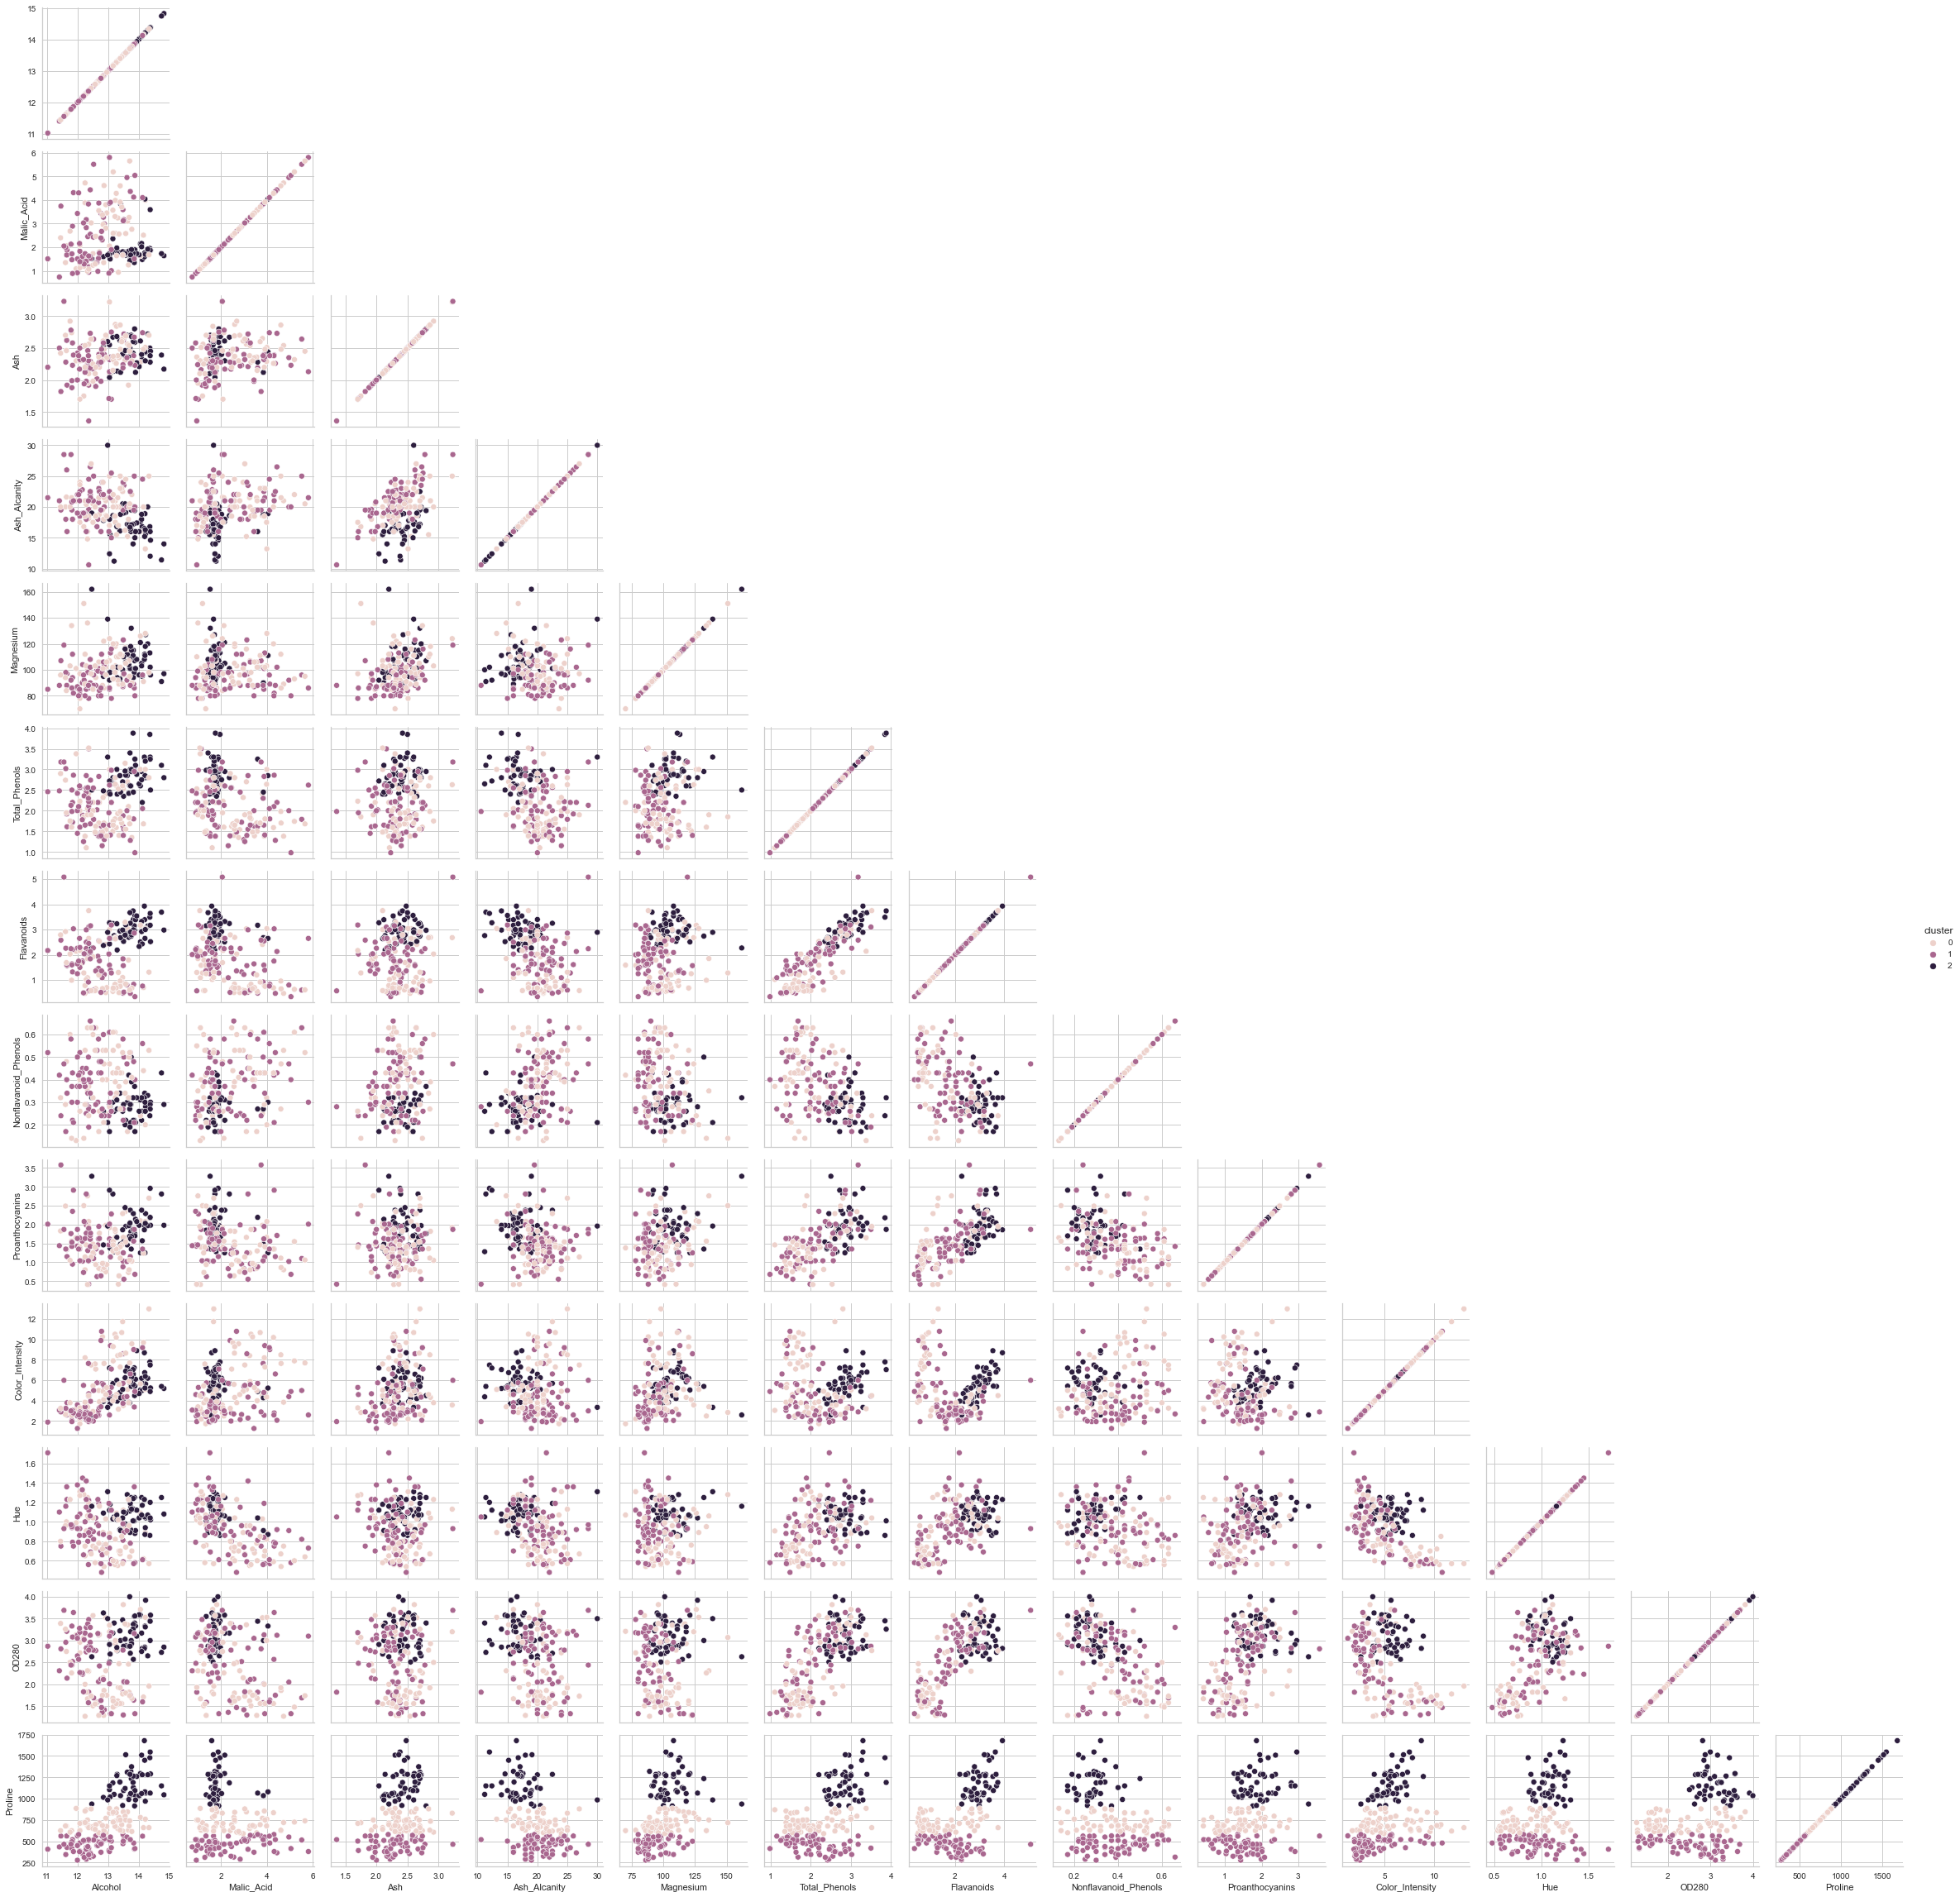

In [35]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(kmed, hue="cluster", corner=True)
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

# DBSCAN

In [36]:
neighbors = 6
# X_embedded is your data
ns=neighbors
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(metadata)
distances, indices = nbrs.kneighbors(metadata)
distance_desc = sorted(distances[:,ns-1], reverse=True)
px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc )

In [37]:
dbscan=DBSCAN(eps=20, min_samples=6).fit(metadata)
dbscan.labels_

array([-1,  0, -1, -1, -1, -1,  1,  1,  0,  0, -1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  1, -1,  0,  1, -1, -1, -1,
       -1, -1,  5, -1,  0, -1, -1,  0, -1,  2,  5, -1,  0, -1,  0,  1, -1,
        1, -1, -1,  0, -1, -1,  1,  1,  3,  2,  3,  4,  3, -1,  2,  3,  3,
       -1, -1,  5,  3,  3, -1,  5,  3,  3,  3, -1,  3, -1, -1,  4,  3,  3,
        3,  3,  6,  2,  4,  3,  3,  3, -1, -1, -1, -1,  3,  2,  3,  2,  6,
        3,  3,  2, -1,  3,  3, -1,  2,  6, -1,  4,  3,  3,  3,  3, -1,  3,
        6,  4,  3, -1,  3,  3,  3, -1,  3, -1,  6, -1,  3,  6,  4,  2,  2,
       -1,  3,  6,  4,  4, -1,  3,  6,  5, -1,  3,  4,  2,  6, -1, -1, -1,
        2,  2, -1,  3,  5,  2,  4,  3,  2,  6,  2,  4,  3,  2,  2, -1,  4,
        3,  3,  2, -1, -1, -1, -1,  6], dtype=int64)

In [38]:
result=metadata.copy()
result['cluster']=dbscan.labels_
result

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  cluster  
0     3.92     1065       -1  
1     3.40     1050        0  
2     3.17     1185       -1  
3     3.45     1480       -1  
4     2.93      735       -1  
..     ...      ...      ...  
173   1.74      740       -1  
174   1.56      750       -1  
175   1.56      835       -1  
176   1.62      840       -1  
177   1.60      560        6  

[178 rows x 14 columns]

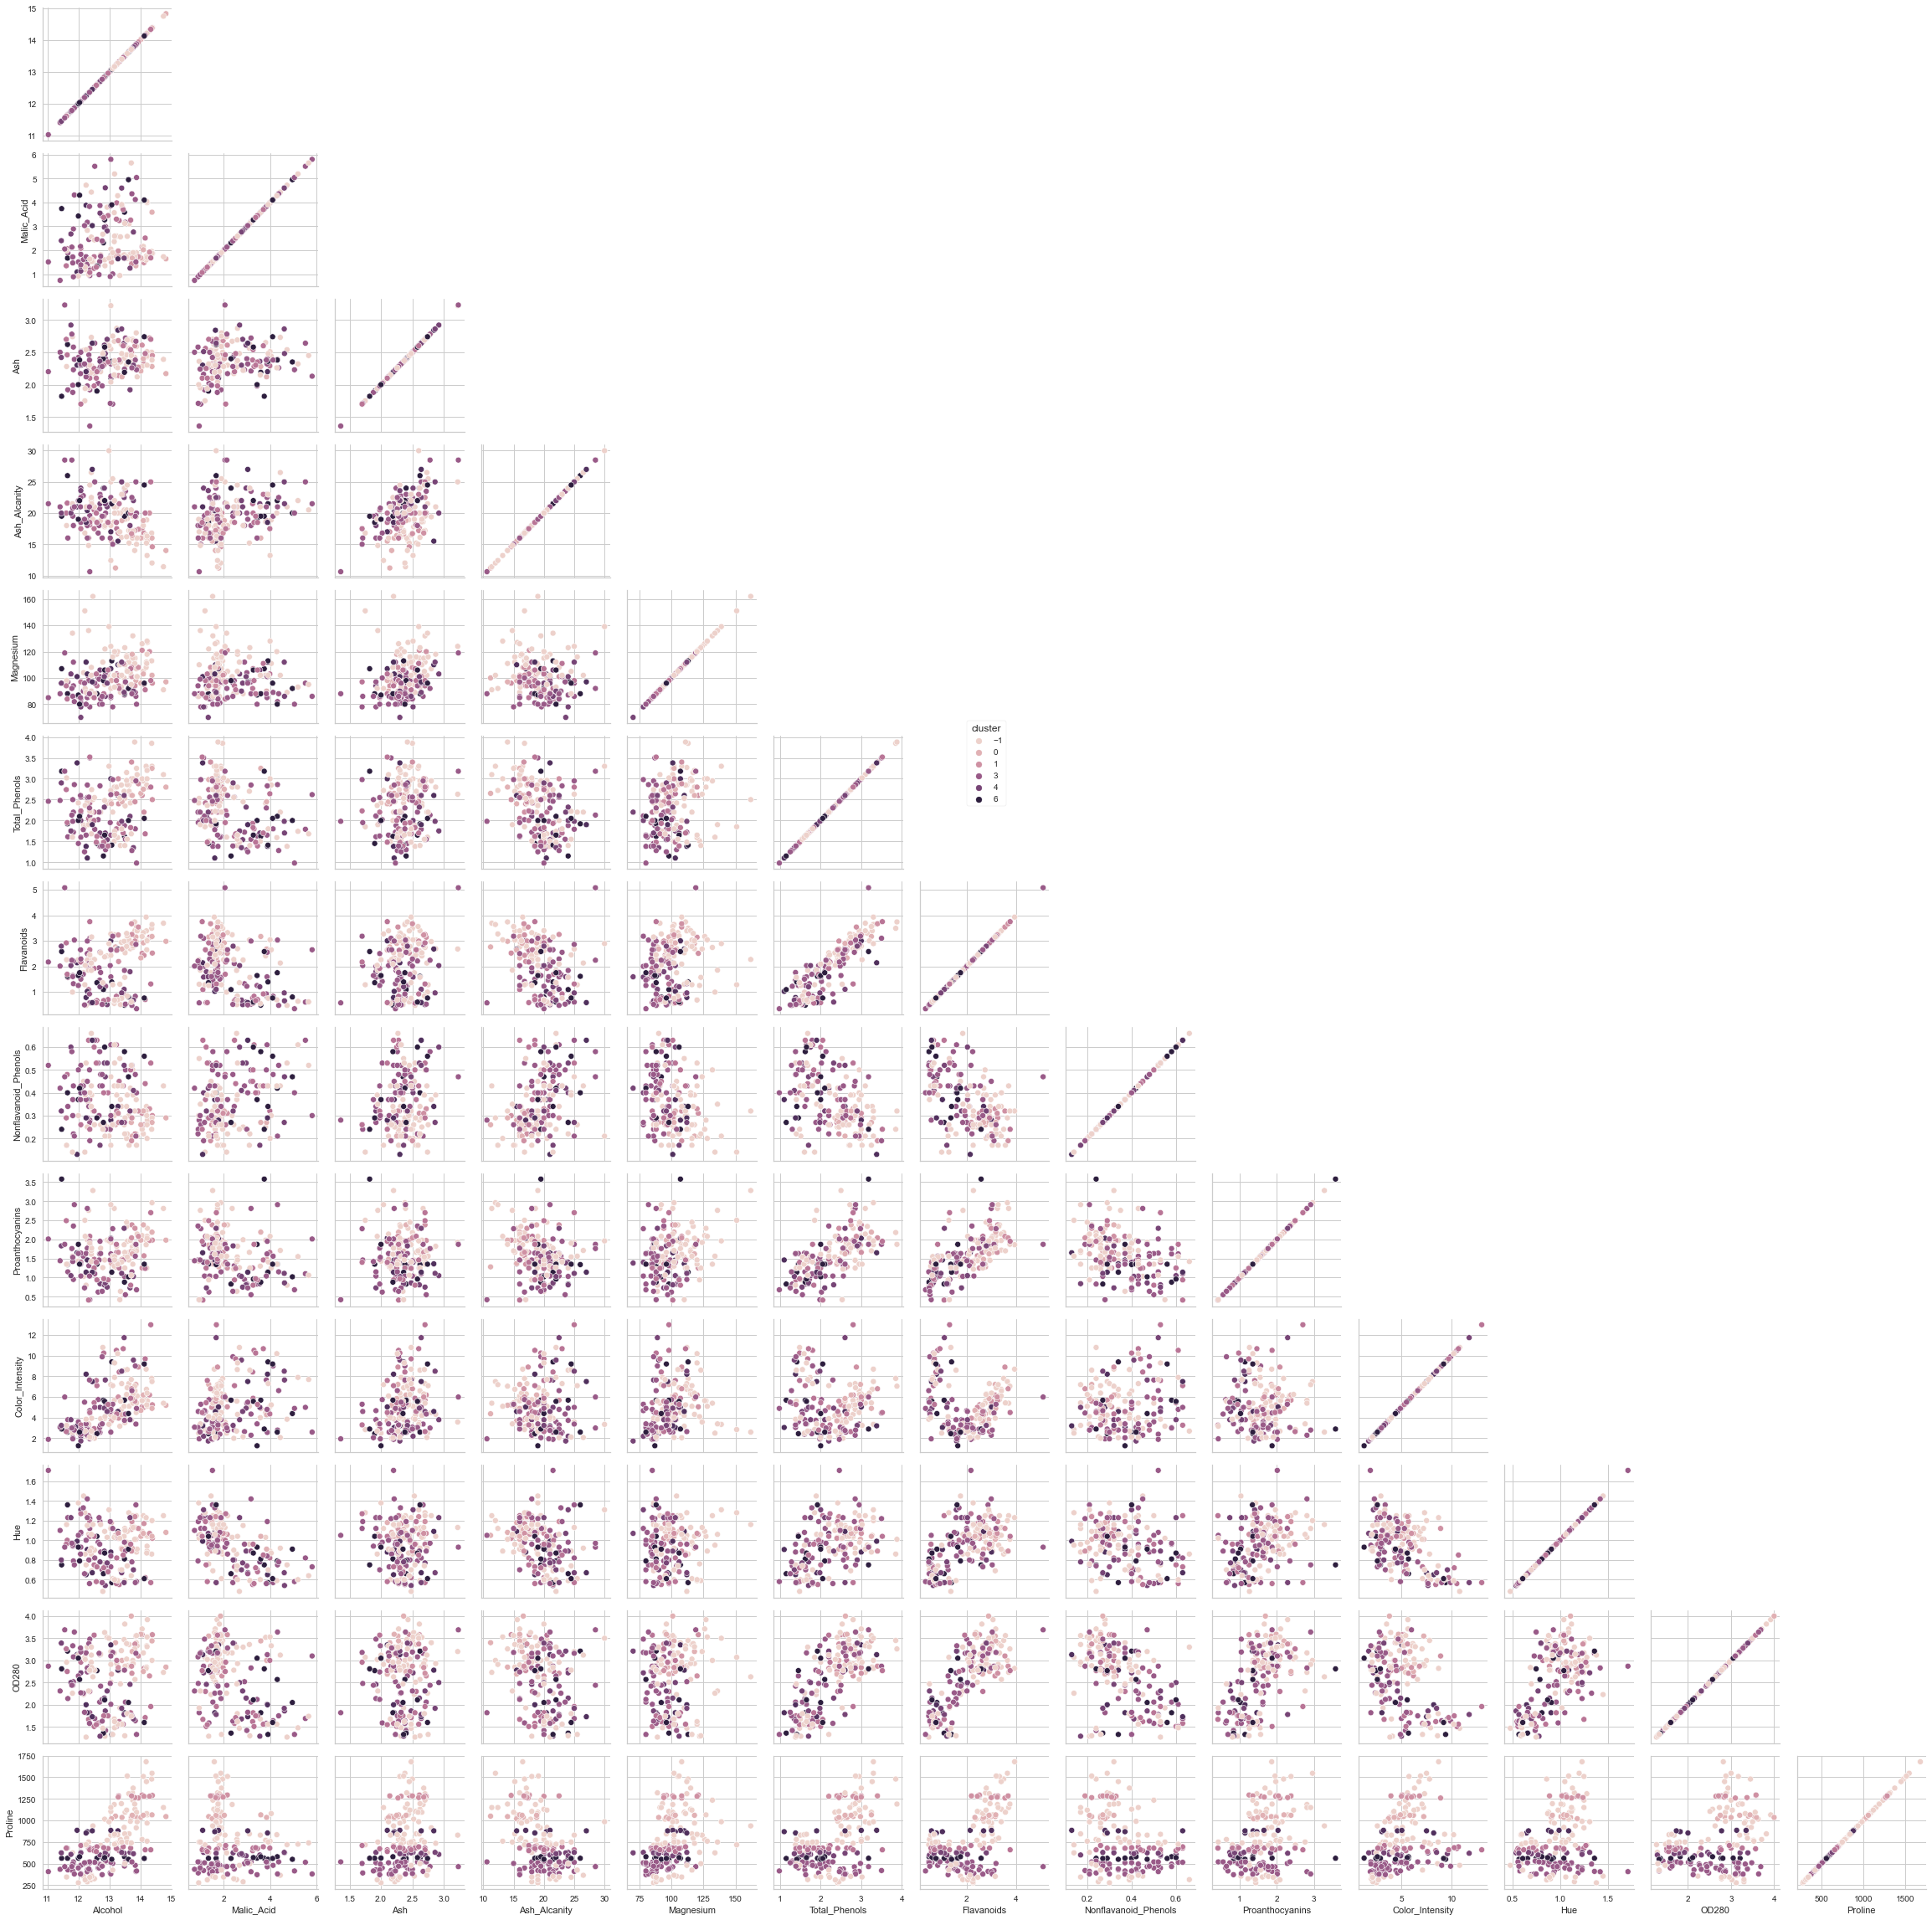

In [39]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(result, hue="cluster", corner=True)
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend(frameon=True, bbox_to_anchor=(.5, .6), loc='center', title='cluster')

In [40]:
result1=result.copy()
result1.drop(result1.loc[result1['cluster']==-1].index, inplace=True)
result1.sort_values(by='cluster')

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
1      13.20        1.78  2.14          11.2        100           2.65   
48     14.10        2.02  2.40          18.8        103           2.75   
46     14.38        3.59  2.28          16.0        102           3.25   
54     13.74        1.67  2.25          16.4        118           2.60   
41     13.41        3.84  2.12          18.8         90           2.45   
..       ...         ...   ...           ...        ...            ...   
138    13.49        3.59  2.19          19.5         88           1.62   
87     11.65        1.67  2.62          26.0         88           1.92   
132    12.81        2.31  2.40          24.0         98           1.15   
101    12.60        1.34  1.90          18.5         88           1.45   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
1          2.76                  0.26             1.28             4.38  1.05   
48         2.92                  0.32             2.38             6.20  1.07   
46         3.17                  0.27             2.19             4.90  1.04   
54         2.90                  0.21             1.62             5.85  0.92   
41         2.68                  0.27             1.48             4.28  0.91   
..          ...                   ...              ...              ...   ...   
138        0.48                  0.58             0.88             5.70  0.81   
87         1.61                  0.40             1.34             2.60  1.36   
132        1.09                  0.27             0.83             5.70  0.66   
101        1.36                  0.29             1.35             2.45  1.04   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  cluster  
1     3.40     1050        0  
48    2.75     1060        0  
46    3.44     1065        0  
54    3.20     1060        0  
41    3.00     1035        0  
..     ...      ...      ...  
138   1.82      580        6  
87    3.21      562        6  
132   1.36      560        6  
101   2.77      562        6  
177   1.60      560        6  

[111 rows x 14 columns]

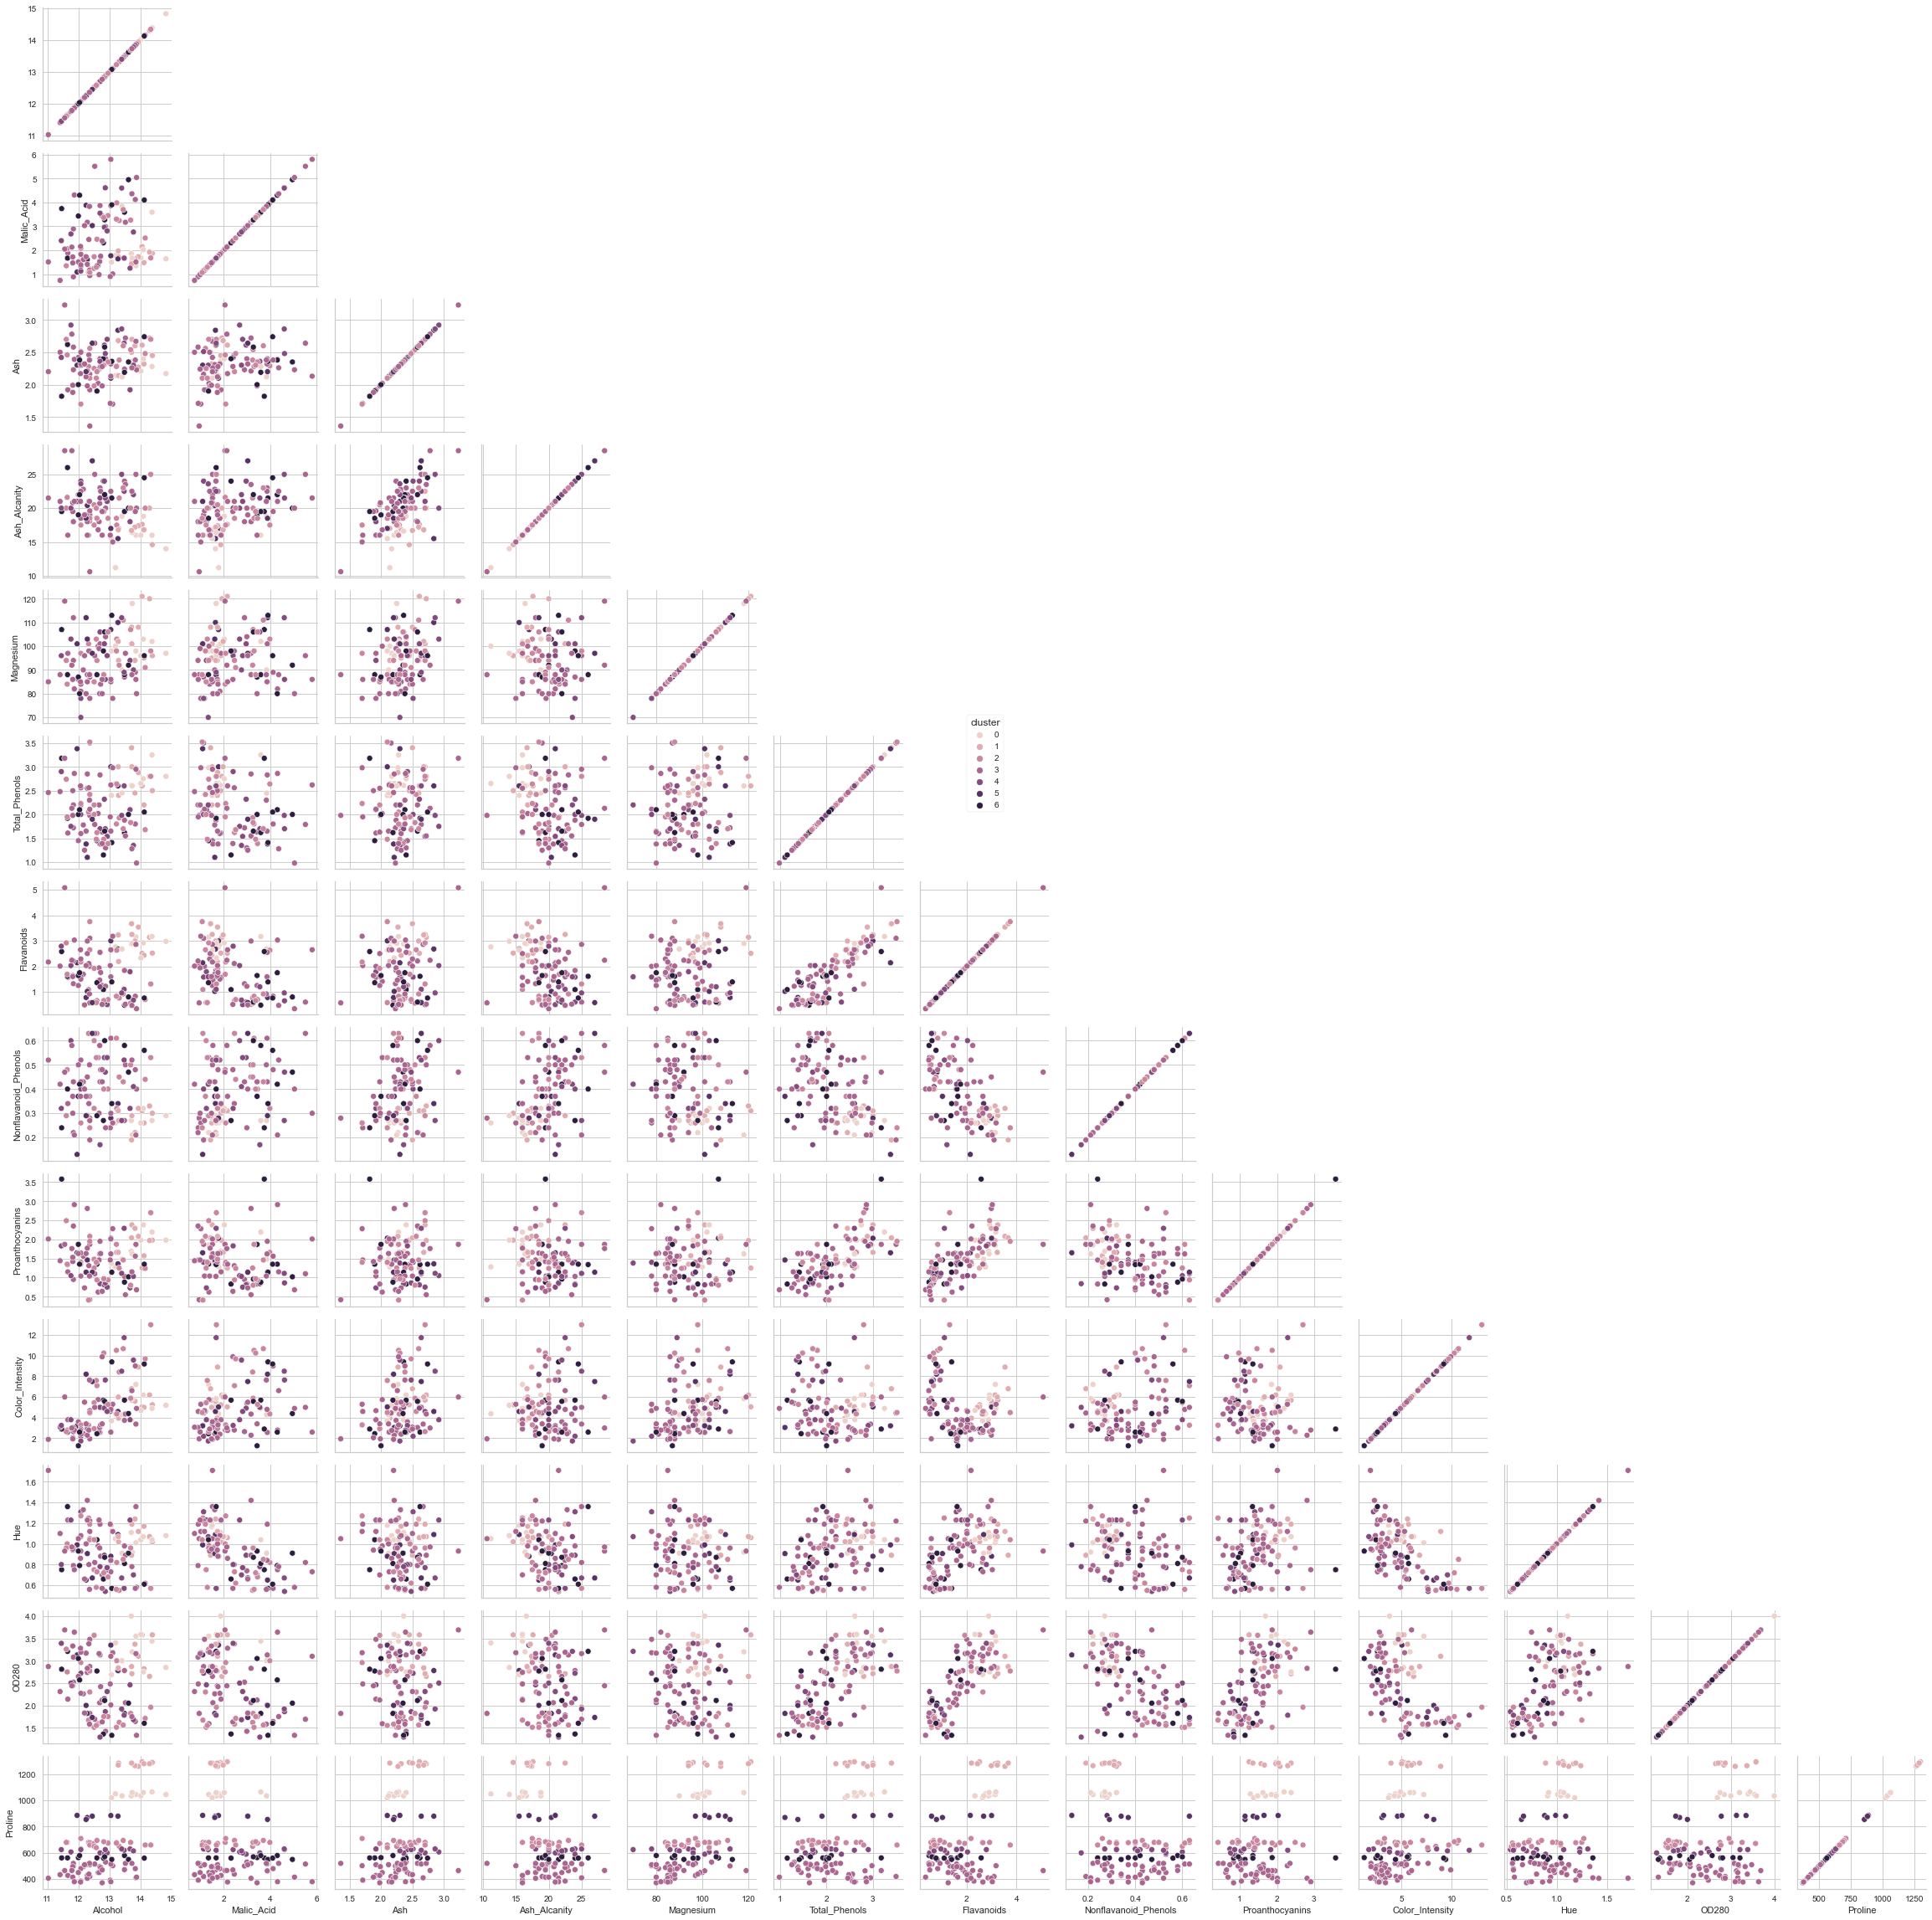

In [41]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(result1, hue="cluster", corner=True)
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend(frameon=True, bbox_to_anchor=(.5, .6), loc='center', title='cluster')